In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import dask
import xarray as xr
from pathlib import Path
import glob

In [33]:
train_loss = []
val_loss = []
val_loss_mean = []
val_loss_area =[]
val_loss_extent =[]

dir_x = '/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/output/fgco2_ems/SOM-FFN/results/Autoencoder/run_set_7/Model_tunning/arch3/'
dirs = ['NV3_batch_lr_reg_tunning_v2_lr_scheduler_8']

for dir_frnt_gen in dirs:

    train_loss.append(xr.open_dataset(dir_x + dir_frnt_gen + '/train_losses.nc')['Train_loss'])
    val_loss.append(xr.open_dataset(dir_x + dir_frnt_gen + '/validation_losses.nc')['Validation_loss'])
    val_loss_mean.append(xr.open_dataset(dir_x + dir_frnt_gen + '/validation_losses_mean.nc')['Validation_loss'])
    val_loss_area.append(xr.open_dataset(dir_x + dir_frnt_gen + '/validation_losses_global.nc')['Validation_loss'])


train_loss = xr.concat(train_loss, dim = 'test_years').sortby('test_years')
val_loss = xr.concat(val_loss, dim = 'test_years').sortby('test_years')
val_loss_mean = xr.concat(val_loss_mean, dim = 'test_years').sortby('test_years')
val_loss_area = xr.concat(val_loss_area, dim = 'test_years').sortby('test_years')


# dir_frnt_gen = '/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/output/fgco2_ems/SOM-FFN/results/Autoencoder/run_set_7/Model_tunning/arch3/NV3_batch_lr_reg_tunning_v3_lr_scheduler_6_1'


# train_loss2 = xr.open_dataset(dir_frnt_gen + '/train_losses.nc').sel(test_years = np.arange(2006,2022))
# val_loss2  = xr.open_dataset(dir_frnt_gen + '/validation_losses.nc').sel(test_years = np.arange(2006,2022))
# val_loss_MSE2 =  xr.open_dataset(dir_frnt_gen + '/validation_MSE.nc').sel(test_years = np.arange(2006,2022))
# # val_loss_corr =  xr.open_dataset(dir_frnt_gen + '/validation_losses_corr.nc').sel(test_years = np.arange(2006,2022))



In [32]:
train_loss = train_loss.isel(hyperparameters = np.arange(0,len(train_loss.hyperparameters),3) )
val_loss = val_loss.isel(hyperparameters = np.arange(0,len(val_loss.hyperparameters),3) )
val_loss_mean = val_loss_mean.isel(hyperparameters = np.arange(0,len(val_loss_mean.hyperparameters),3) )
val_loss_area = val_loss_area.isel(hyperparameters = np.arange(0,len(val_loss_area.hyperparameters),3) )

# AutoEncoder

## Batch reg_scale

## arch2

## V1

In [3]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss_corr.Validation_loss.argmax('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best epochs arch2', transform=ax.transAxes)
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))



NameError: name 'val_loss_corr' is not defined

<Figure size 1200x800 with 0 Axes>

Text(0.5, 394.72222222222223, "['batch_size', 'reg_scale']")

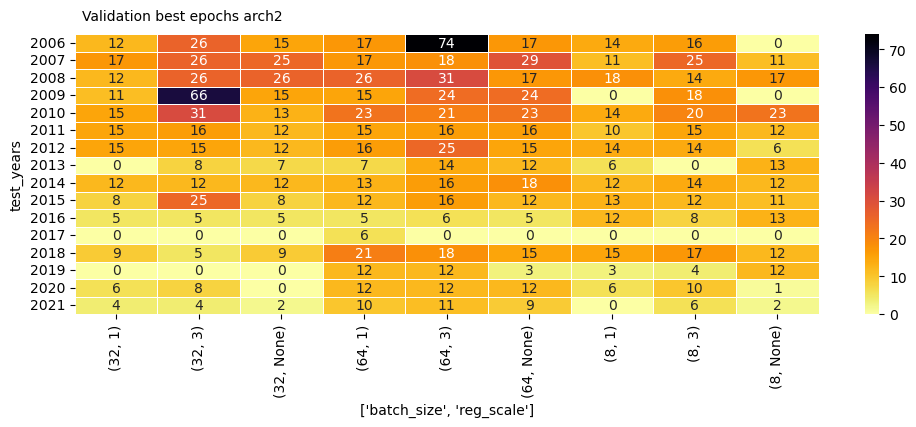

In [28]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss.Validation_loss.argmin('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best epochs arch2', transform=ax.transAxes)
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))



Text(0.5, 394.72222222222223, "['batch_size', 'reg_scale']")

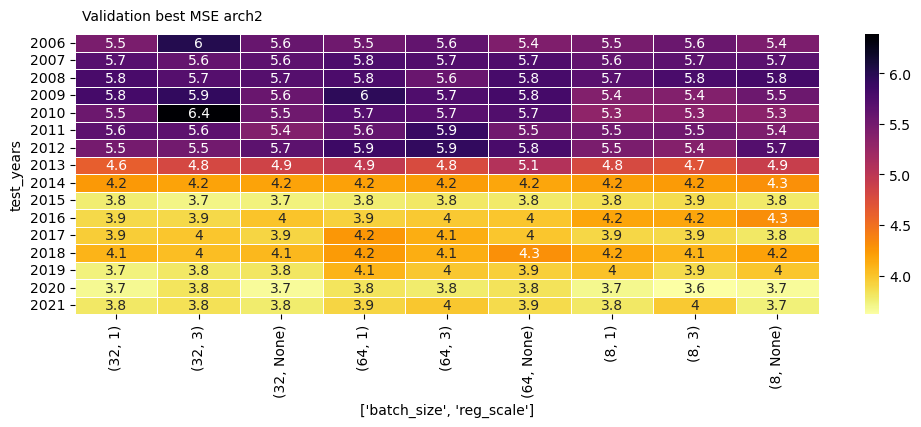

In [20]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss.Validation_loss.min('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best MSE arch2', transform=ax.transAxes)
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))



Text(0.5, 0, "['batch_size', 'reg_scale']")

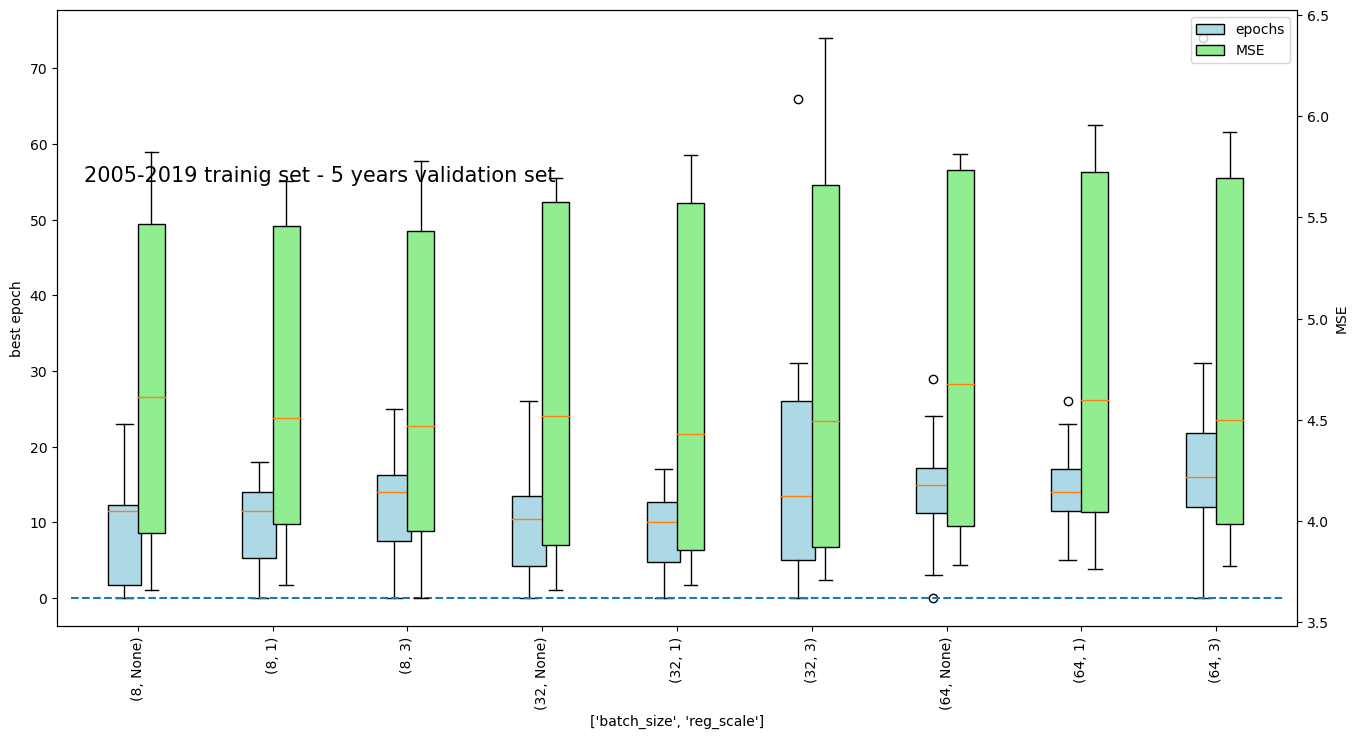

In [21]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

hp_num = len(val_loss.hyperparameters)
plt.figure(figsize = (16,8))
dataframe = val_loss.Validation_loss.argmin('epochs')
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightblue"), widths=0.25, positions = np.arange(hp_num)-0.1)
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.hlines(0, -0.5,hp_num - 0.5, linestyle = 'dashed')

plt.ylabel('best epoch')
plt.text(-0.4,55, '2005-2019 trainig set - 5 years validation set ', size = 15)
plt.twinx()
dataframe = val_loss.Validation_loss.min('epochs')
b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['epochs', 'MSE'], loc='upper right')
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))

Text(0.5, 0, "['batch_size', 'reg_scale']")

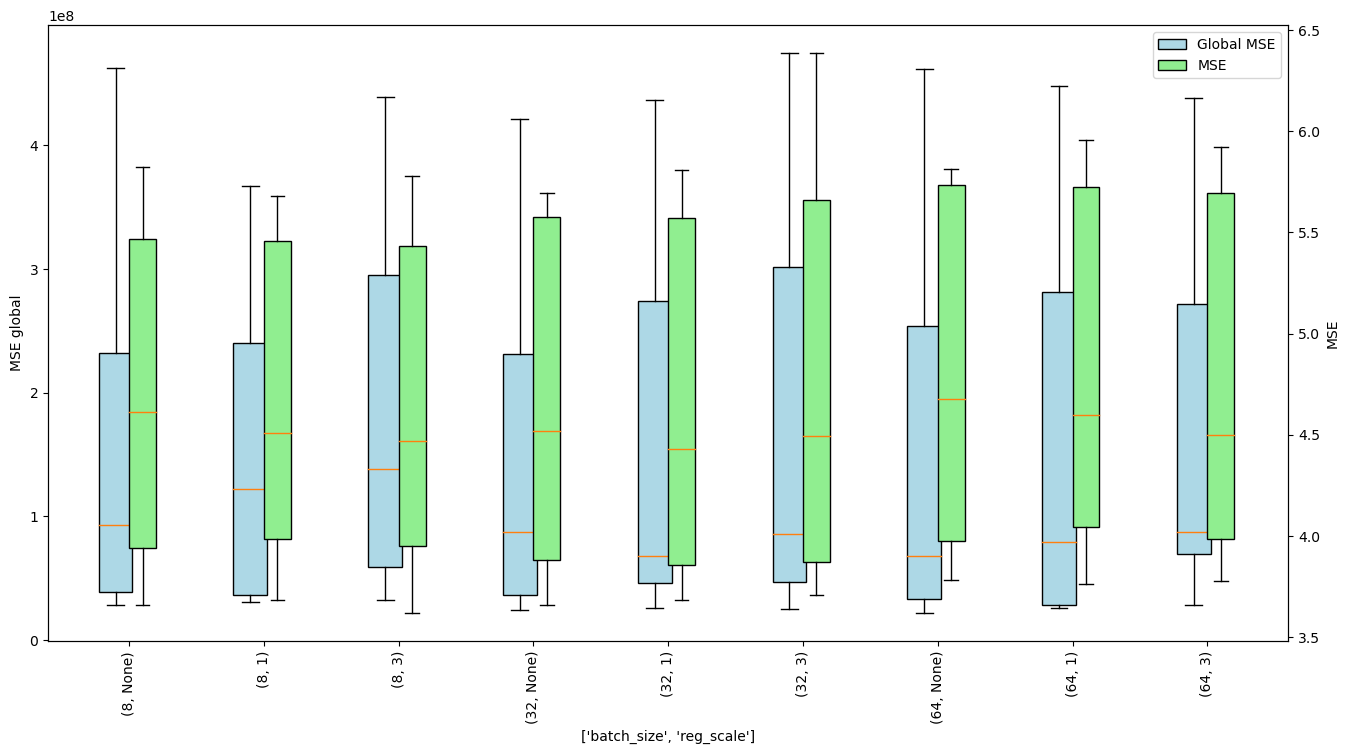

In [22]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (16,8))
dataframe = val_loss_global.Validation_loss.sel(epochs = val_loss.Validation_loss.argmin('epochs') )
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightblue"), widths=0.25, positions = np.arange(hp_num)-0.1)
plt.xlabel((val_loss_global.Validation_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)

plt.ylabel('MSE global')
# plt.text(-0.4,55, '2005-2019 trainig set - 5 years validation set ', size = 15)
plt.twinx()
dataframe = val_loss.Validation_loss.min('epochs')
b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['Global MSE', 'MSE'], loc='upper right')
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))

Text(0.5, 0, "['batch_size', 'reg_scale']")

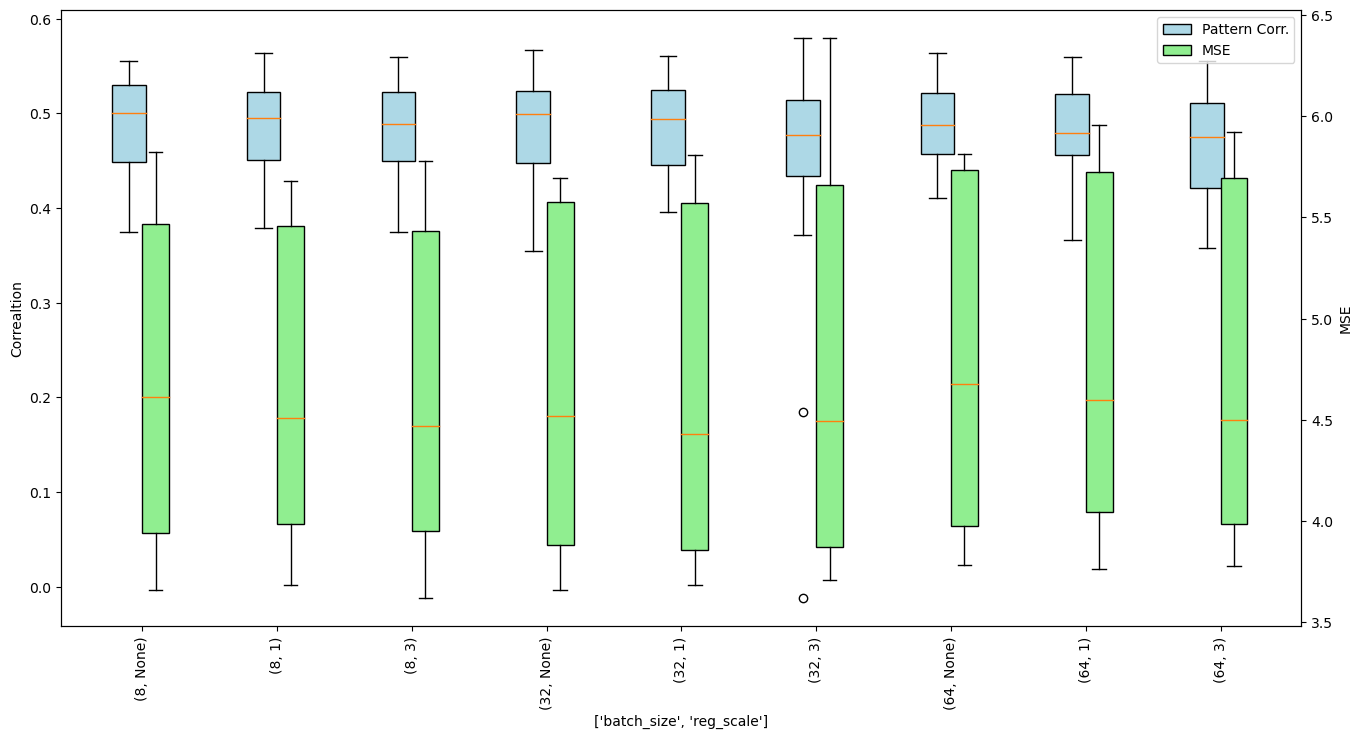

In [23]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (16,8))
dataframe = val_loss_corr.Validation_loss.sel(epochs = val_loss.Validation_loss.argmin('epochs') )
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightblue"), widths=0.25, positions = np.arange(hp_num)-0.1)
plt.xlabel((val_loss_global.Validation_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)

plt.ylabel('Correaltion')
# plt.text(-0.4,55, '2005-2019 trainig set - 5 years validation set ', size = 15)
plt.twinx()
dataframe = val_loss.Validation_loss.min('epochs')
b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['Pattern Corr.', 'MSE'], loc='upper right')
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))

Text(0.5, 394.72222222222223, "['batch_size', 'reg_scale']")

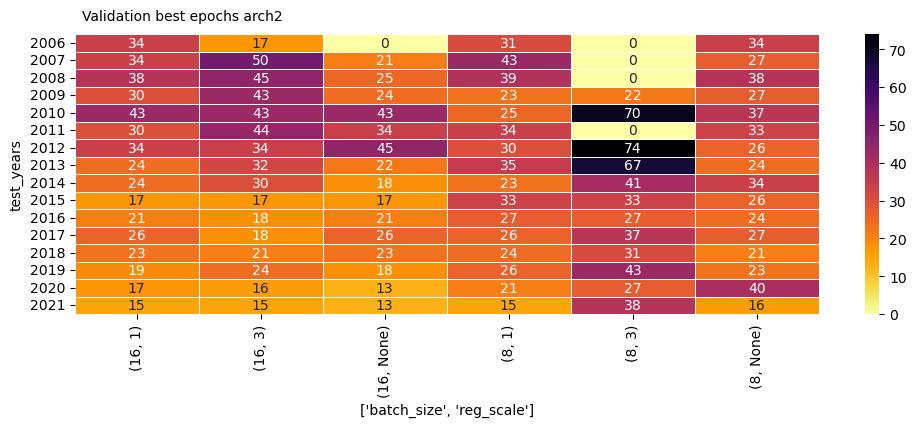

In [8]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss_corr.Validation_loss.argmax('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best epochs arch2', transform=ax.transAxes)
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))



Text(0.5, 394.72222222222223, "['batch_size', 'reg_scale']")

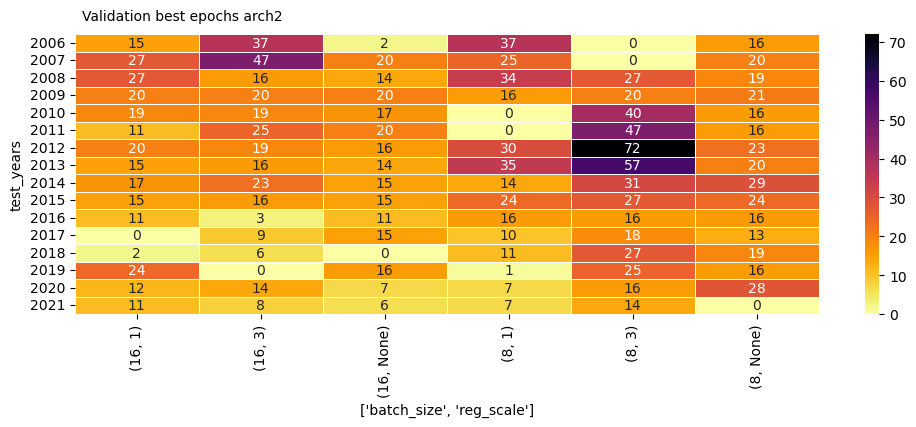

In [7]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss.Validation_loss.argmin('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best epochs arch2', transform=ax.transAxes)
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))



Text(0.5, 394.72222222222223, "['batch_size', 'reg_scale']")

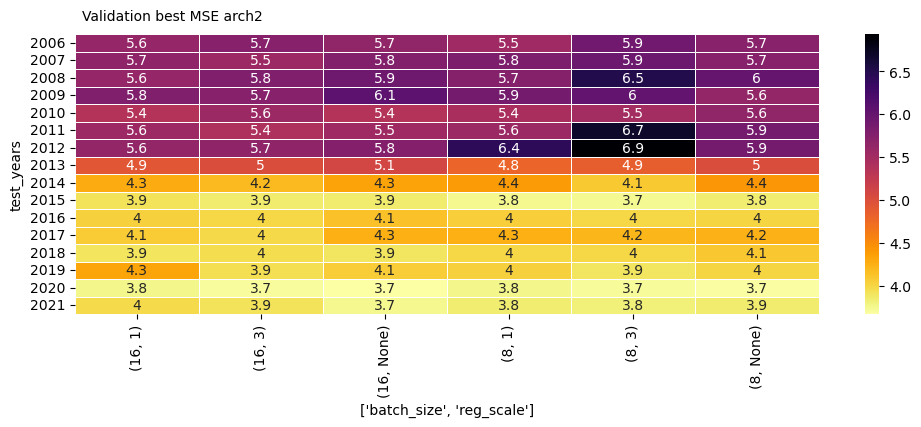

In [9]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss.Validation_loss.min('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best MSE arch2', transform=ax.transAxes)
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))



Text(0.5, 0, "['batch_size', 'reg_scale']")

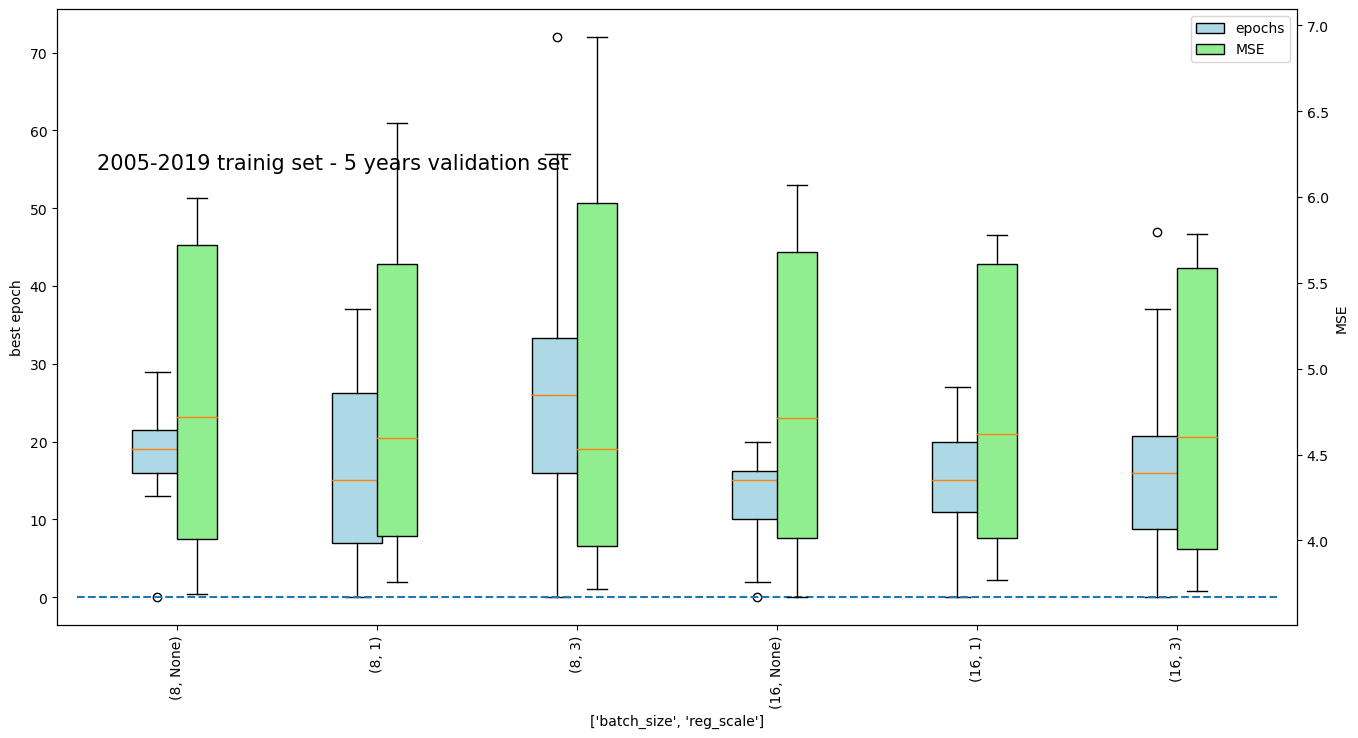

In [10]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

hp_num = len(val_loss.hyperparameters)
plt.figure(figsize = (16,8))
dataframe = val_loss.Validation_loss.argmin('epochs')
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightblue"), widths=0.25, positions = np.arange(hp_num)-0.1)
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.hlines(0, -0.5,hp_num - 0.5, linestyle = 'dashed')

plt.ylabel('best epoch')
plt.text(-0.4,55, '2005-2019 trainig set - 5 years validation set ', size = 15)
plt.twinx()
dataframe = val_loss.Validation_loss.min('epochs')
b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['epochs', 'MSE'], loc='upper right')

plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))

Text(0.5, 0, "['batch_size', 'reg_scale']")

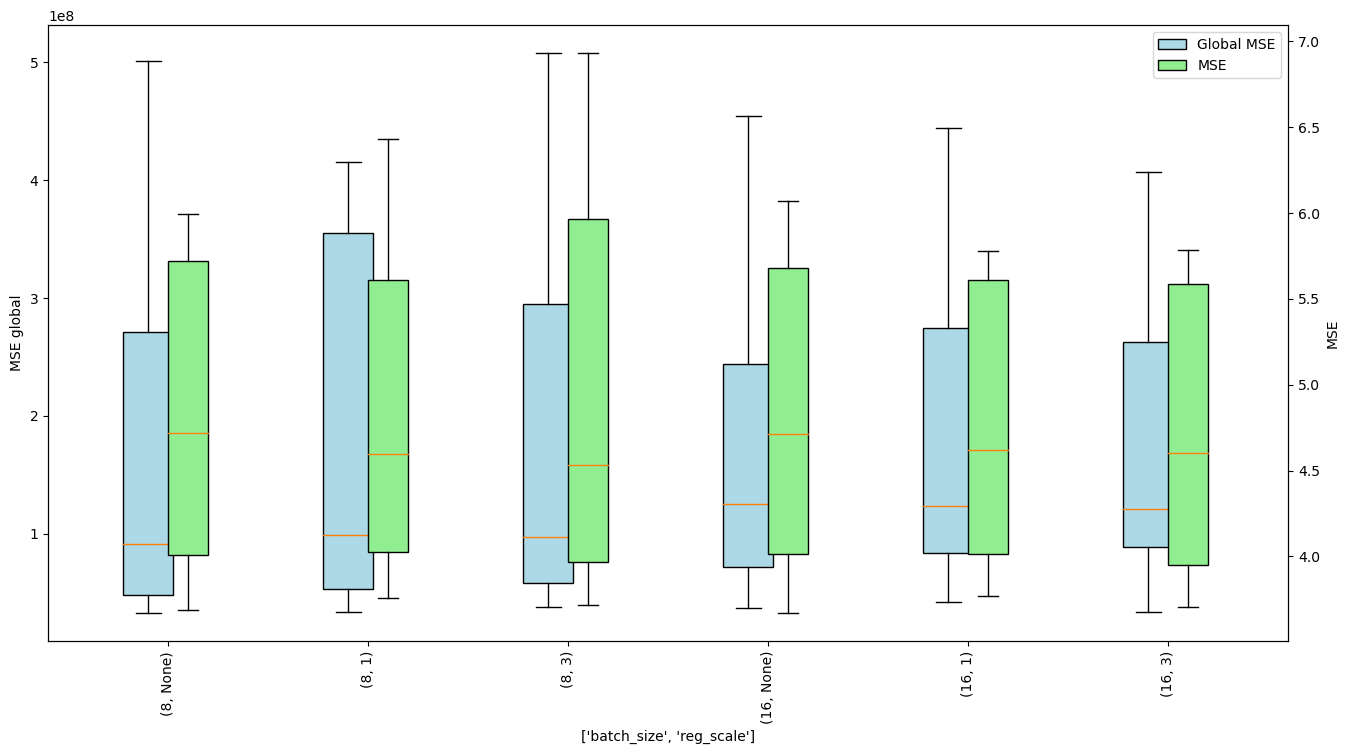

In [11]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (16,8))
dataframe = val_loss_global.Validation_loss.sel(epochs = val_loss.Validation_loss.argmin('epochs') )
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightblue"), widths=0.25, positions = np.arange(hp_num)-0.1)
plt.xlabel((val_loss_global.Validation_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)

plt.ylabel('MSE global')
# plt.text(-0.4,55, '2005-2019 trainig set - 5 years validation set ', size = 15)
plt.twinx()
dataframe = val_loss.Validation_loss.min('epochs')
b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['Global MSE', 'MSE'], loc='upper right')
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))

## V3

Text(0.5, 394.72222222222223, "['L2_reg', 'batch_size', 'reg_scale']")

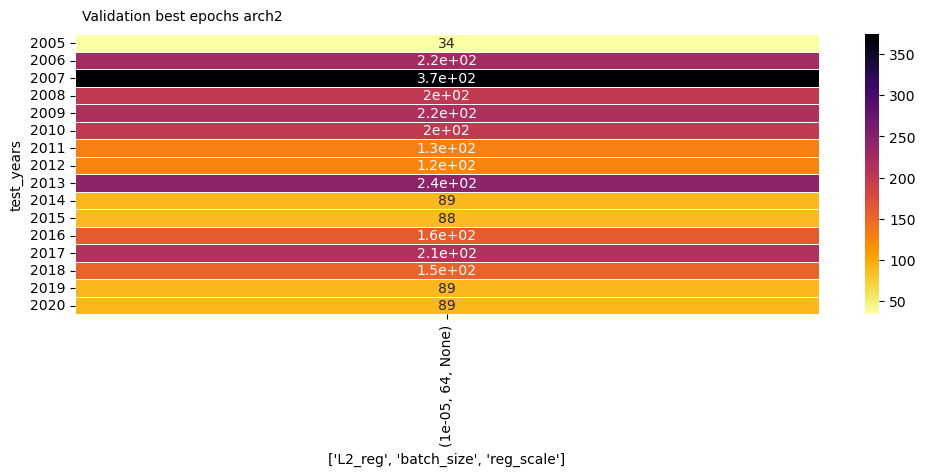

In [34]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss.argmin('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best epochs arch2', transform=ax.transAxes)
plt.xlabel((val_loss.attrs['hyperparameters']))



Text(0.5, 394.72222222222223, "['L2_reg', 'batch_size', 'reg_scale']")

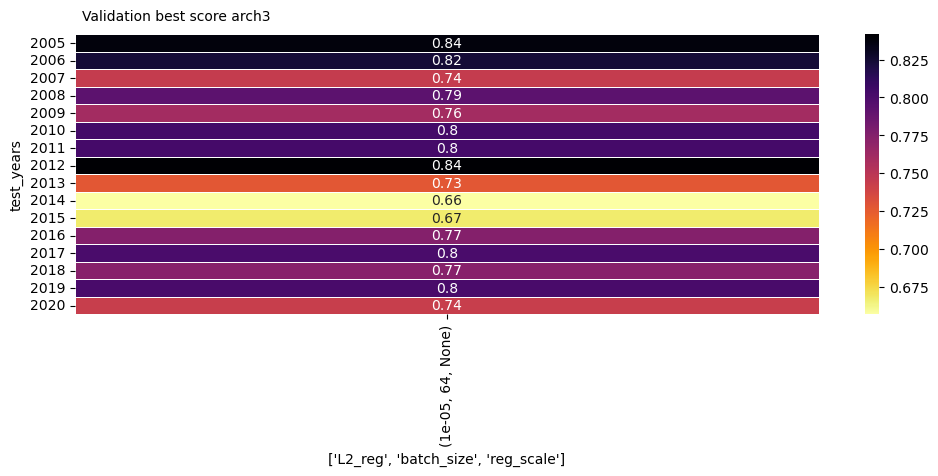

In [35]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss.min('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best score arch3', transform=ax.transAxes)
plt.xlabel((val_loss.attrs['hyperparameters']))



Text(0.5, 0, "['L2_reg', 'batch_size', 'reg_scale']")

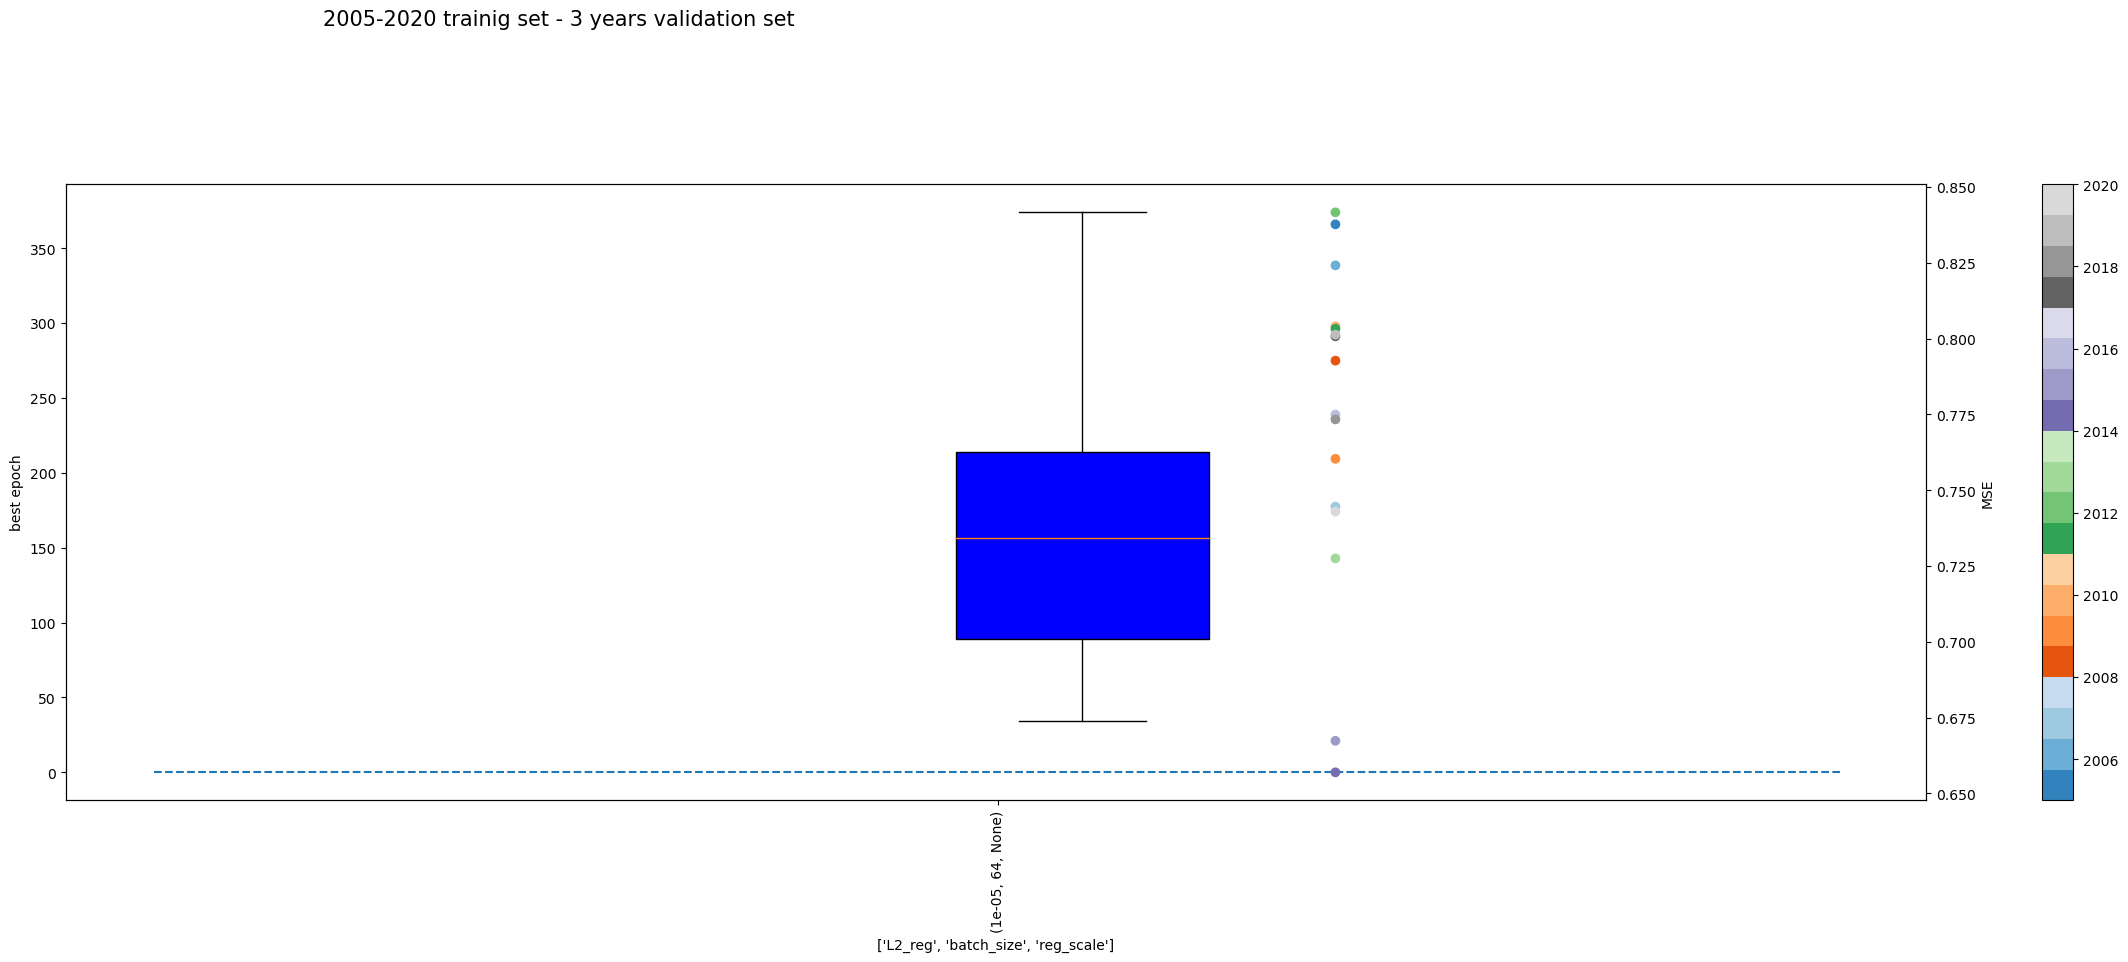

In [36]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

hp_num = len(val_loss.hyperparameters)
plt.figure(figsize = (30,8))
dataframe = val_loss.argmin('epochs')
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "blue"), widths=0.15, positions = np.arange(hp_num)+0.05)
#################################
# dataframe2 = val_loss2.Validation_loss.argmin('epochs')
# b2 = plt.boxplot(dataframe2.values,patch_artist = True, boxprops = dict(facecolor = "green"), widths=0.15, positions = np.arange(hp_num)-0.25)
#################################
plt.xlabel((val_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.hlines(0, -0.5,hp_num - 0.5, linestyle = 'dashed')

plt.ylabel('best epoch')
plt.text(-0.4,val_loss.shape[-1]-1, '2005-2020 trainig set - 3 years validation set ', size = 15)
plt.twinx()
#################################
dataframe = val_loss.min('epochs')
# b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
for i in range(len(dataframe.hyperparameters)):
    plt.scatter((i+0.2)*np.ones(len(dataframe.test_years)),dataframe.isel(hyperparameters = i), c = dataframe.test_years , cmap = 'tab20c')
    if i==0:
        plt.colorbar()
#################################
# dataframe2 = val_loss2.Validation_loss.min('epochs')
# # b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
# for i in range(len(dataframe2.hyperparameters)):
#     plt.scatter((i-0.1)*np.ones(len(dataframe2.test_years)),dataframe2.isel(hyperparameters = i), c = dataframe2.test_years , cmap = 'tab20c' )
##############################

plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
# plt.legend([b1["boxes"][0], b2["boxes"][0]], ['epochs', 'MSE'], loc='upper right')
# plt.legend([b1["boxes"][0], b2["boxes"][0]], ['Reg ', 'Reg LY mask 5'], loc='upper right')

plt.xlabel((val_loss.attrs['hyperparameters']))

Text(0.5, 0, "['L2_reg', 'batch_size', 'reg_scale']")

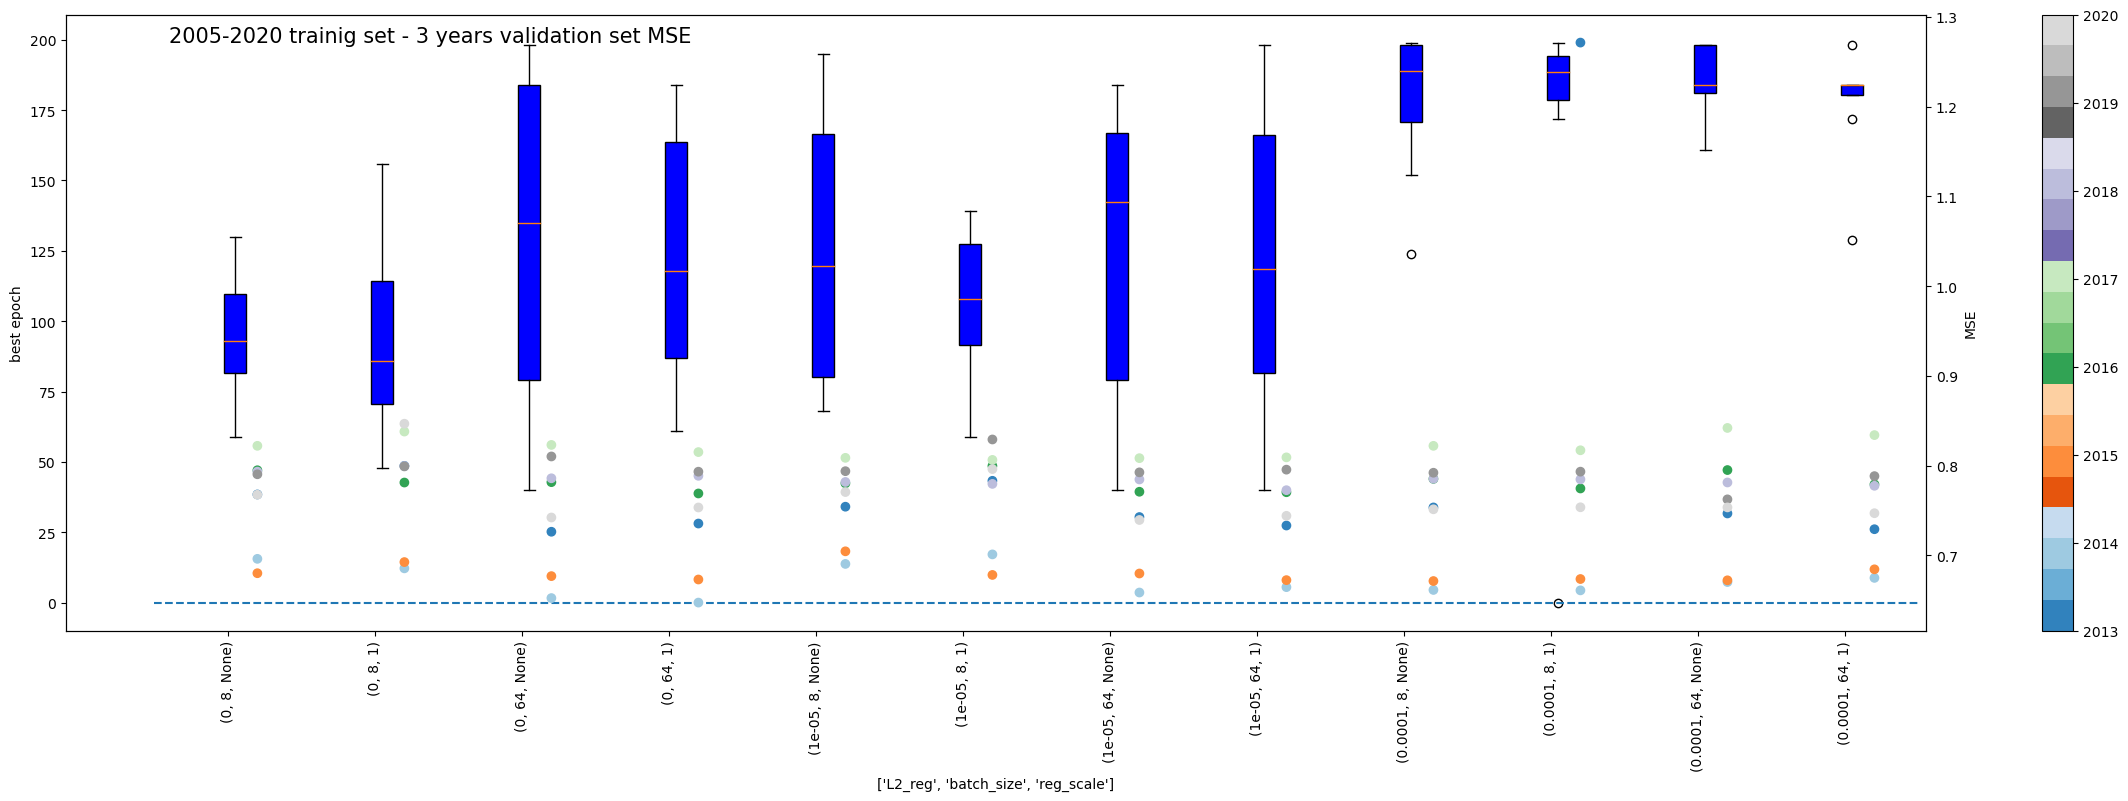

In [29]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

hp_num = len(val_loss.hyperparameters)
plt.figure(figsize = (30,8))
dataframe = val_loss.argmin('epochs')
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "blue"), widths=0.15, positions = np.arange(hp_num)+0.05)
#################################
# dataframe2 = val_loss2.Validation_loss.argmin('epochs')
# b2 = plt.boxplot(dataframe2.values,patch_artist = True, boxprops = dict(facecolor = "green"), widths=0.15, positions = np.arange(hp_num)-0.25)
#################################
plt.xlabel((val_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.hlines(0, -0.5,hp_num - 0.5, linestyle = 'dashed')

plt.ylabel('best epoch')
plt.text(-0.4,val_loss.shape[-1]-1, '2005-2020 trainig set - 3 years validation set MSE ', size = 15)
plt.twinx()
#################################
ls = []
for test_year in val_loss.test_years.values:
    inds = val_loss.argmin('epochs').sel(test_years = test_year)
    ls.append(xr.concat([val_loss_mean.sel(test_years = test_year).isel(hyperparameters = i)[inds[i]] for i in range(val_loss_mean.shape[1])], dim = 'hyperparameters'))

dataframe = xr.concat(ls, dim = 'test_years')
# b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
for i in range(len(dataframe.hyperparameters)):
    plt.scatter((i+0.2)*np.ones(len(dataframe.test_years)),dataframe.isel(hyperparameters = i), c = dataframe.test_years , cmap = 'tab20c')
    if i==0:
        plt.colorbar()
#################################
# dataframe2 = val_loss2.Validation_loss.min('epochs')
# # b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
# for i in range(len(dataframe2.hyperparameters)):
#     plt.scatter((i-0.1)*np.ones(len(dataframe2.test_years)),dataframe2.isel(hyperparameters = i), c = dataframe2.test_years , cmap = 'tab20c' )
##############################

plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
# plt.legend([b1["boxes"][0], b2["boxes"][0]], ['epochs', 'MSE'], loc='upper right')
# plt.legend([b1["boxes"][0], b2["boxes"][0]], ['Reg ', 'Reg LY mask 5'], loc='upper right')

plt.xlabel((val_loss.attrs['hyperparameters']))

Text(0.5, 0, "['L2_reg', 'batch_size', 'reg_scale']")

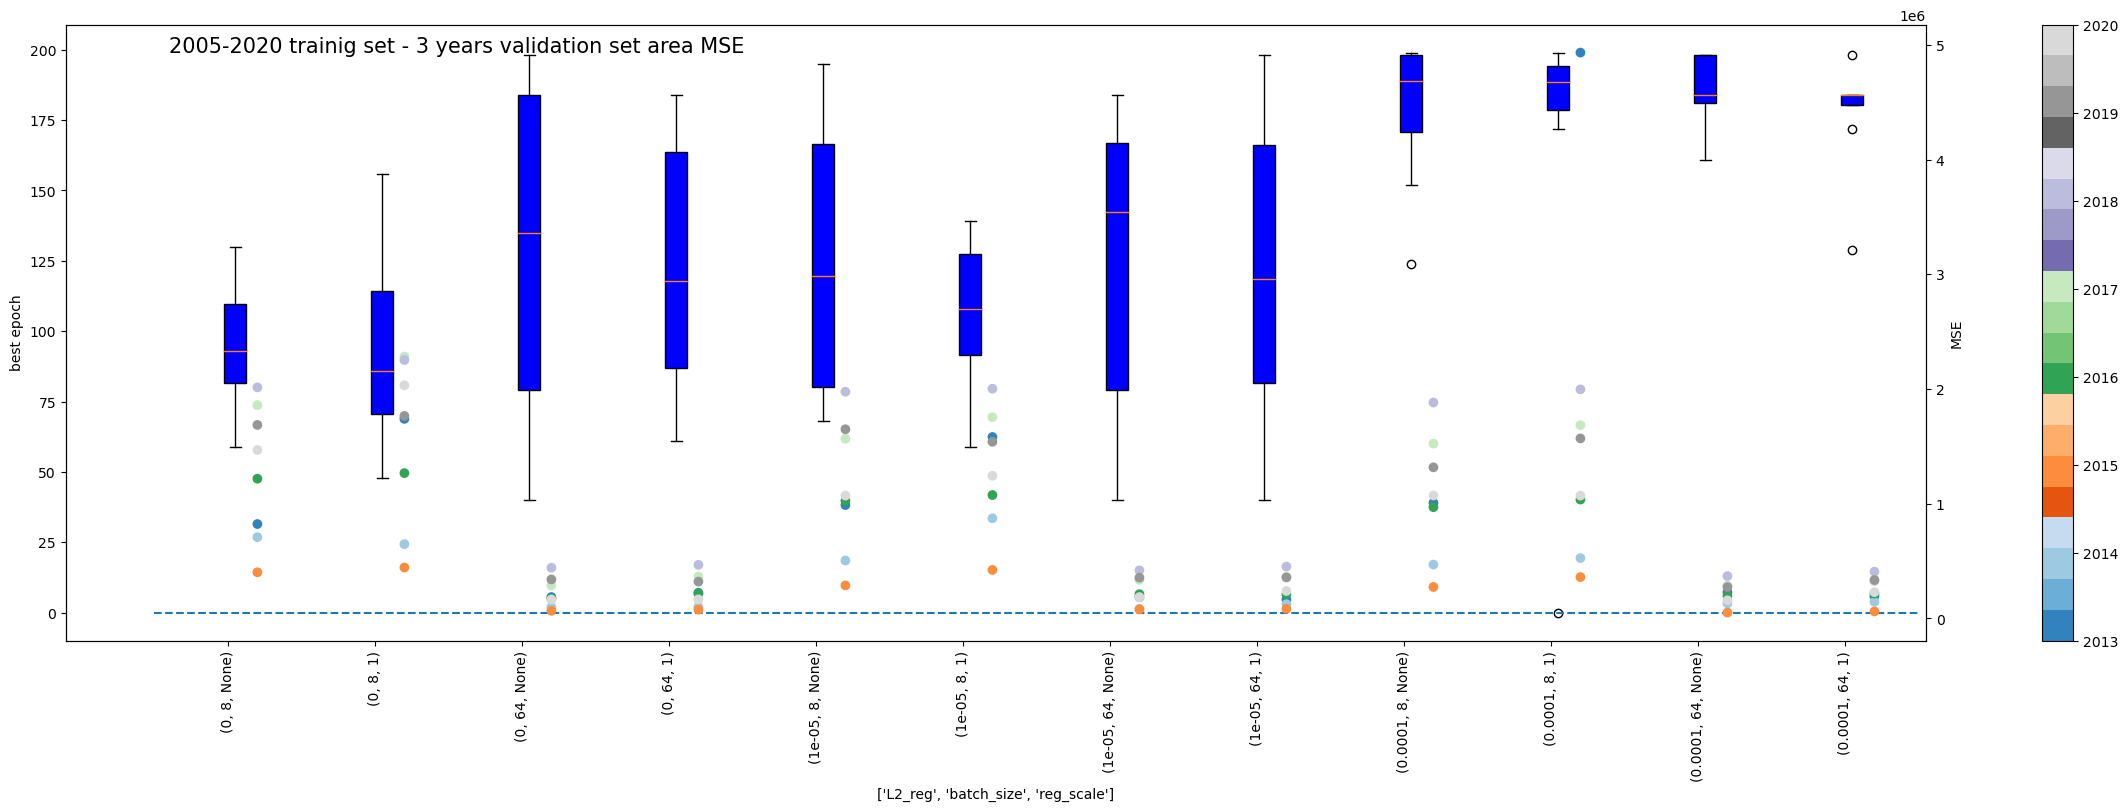

In [30]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

hp_num = len(val_loss.hyperparameters)
plt.figure(figsize = (30,8))
dataframe = val_loss.argmin('epochs')
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "blue"), widths=0.15, positions = np.arange(hp_num)+0.05)
#################################
# dataframe2 = val_loss2.Validation_loss.argmin('epochs')
# b2 = plt.boxplot(dataframe2.values,patch_artist = True, boxprops = dict(facecolor = "green"), widths=0.15, positions = np.arange(hp_num)-0.25)
#################################
plt.xlabel((val_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.hlines(0, -0.5,hp_num - 0.5, linestyle = 'dashed')

plt.ylabel('best epoch')
plt.text(-0.4,val_loss.shape[-1]-1, '2005-2020 trainig set - 3 years validation set area MSE ', size = 15)
plt.twinx()
#################################
ls = []
for test_year in val_loss.test_years.values:
    inds = val_loss.argmin('epochs').sel(test_years = test_year)
    ls.append(xr.concat([val_loss_area.sel(test_years = test_year).isel(hyperparameters = i)[inds[i]] for i in range(val_loss_area.shape[1])], dim = 'hyperparameters'))

dataframe = xr.concat(ls, dim = 'test_years')
# b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
for i in range(len(dataframe.hyperparameters)):
    plt.scatter((i+0.2)*np.ones(len(dataframe.test_years)),dataframe.isel(hyperparameters = i), c = dataframe.test_years , cmap = 'tab20c')
    if i==0:
        plt.colorbar()
#################################
# dataframe2 = val_loss2.Validation_loss.min('epochs')
# # b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
# for i in range(len(dataframe2.hyperparameters)):
#     plt.scatter((i-0.1)*np.ones(len(dataframe2.test_years)),dataframe2.isel(hyperparameters = i), c = dataframe2.test_years , cmap = 'tab20c' )
##############################

plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
# plt.legend([b1["boxes"][0], b2["boxes"][0]], ['epochs', 'MSE'], loc='upper right')
# plt.legend([b1["boxes"][0], b2["boxes"][0]], ['Reg ', 'Reg LY mask 5'], loc='upper right')

plt.xlabel((val_loss.attrs['hyperparameters']))

## V33 decoupled

### Patterns

Text(0.5, 394.72222222222223, "['lr', 'batch_size', 'L2_reg', 'dropout_rate', 'reg_scale']")

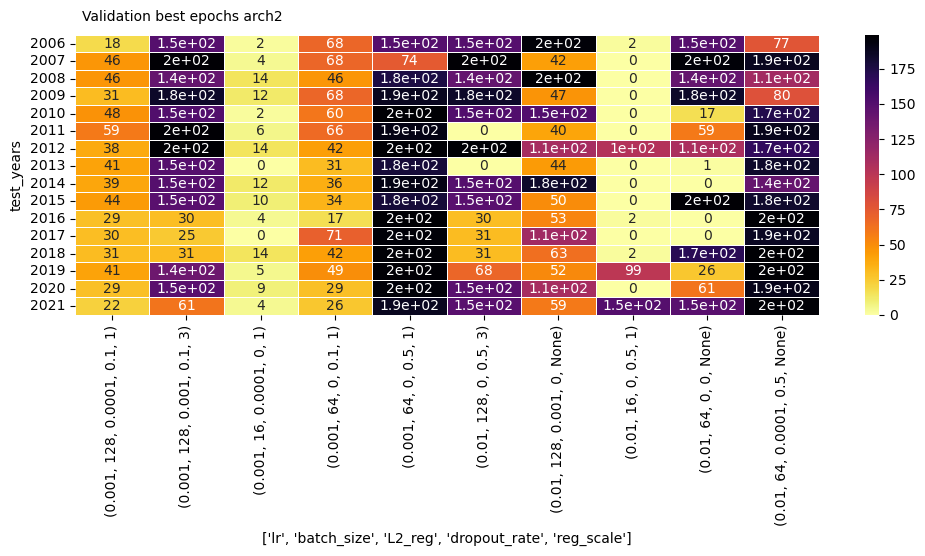

In [24]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss.Validation_loss.argmin('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best epochs arch2', transform=ax.transAxes)
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))




Text(0.5, 394.72222222222223, "['lr', 'batch_size', 'L2_reg', 'dropout_rate', 'reg_scale']")

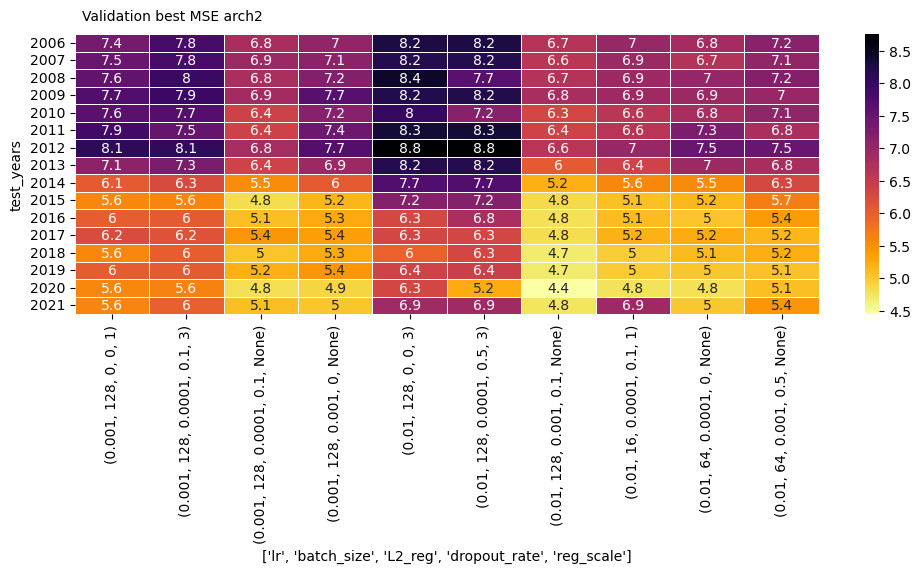

In [21]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss2.Validation_loss.min('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best MSE arch2', transform=ax.transAxes)
plt.xlabel((val_loss2.Validation_loss.attrs['hyperparameters']))



Text(0.5, 0, "['lr', 'batch_size', 'L2_reg', 'dropout_rate', 'reg_scale']")

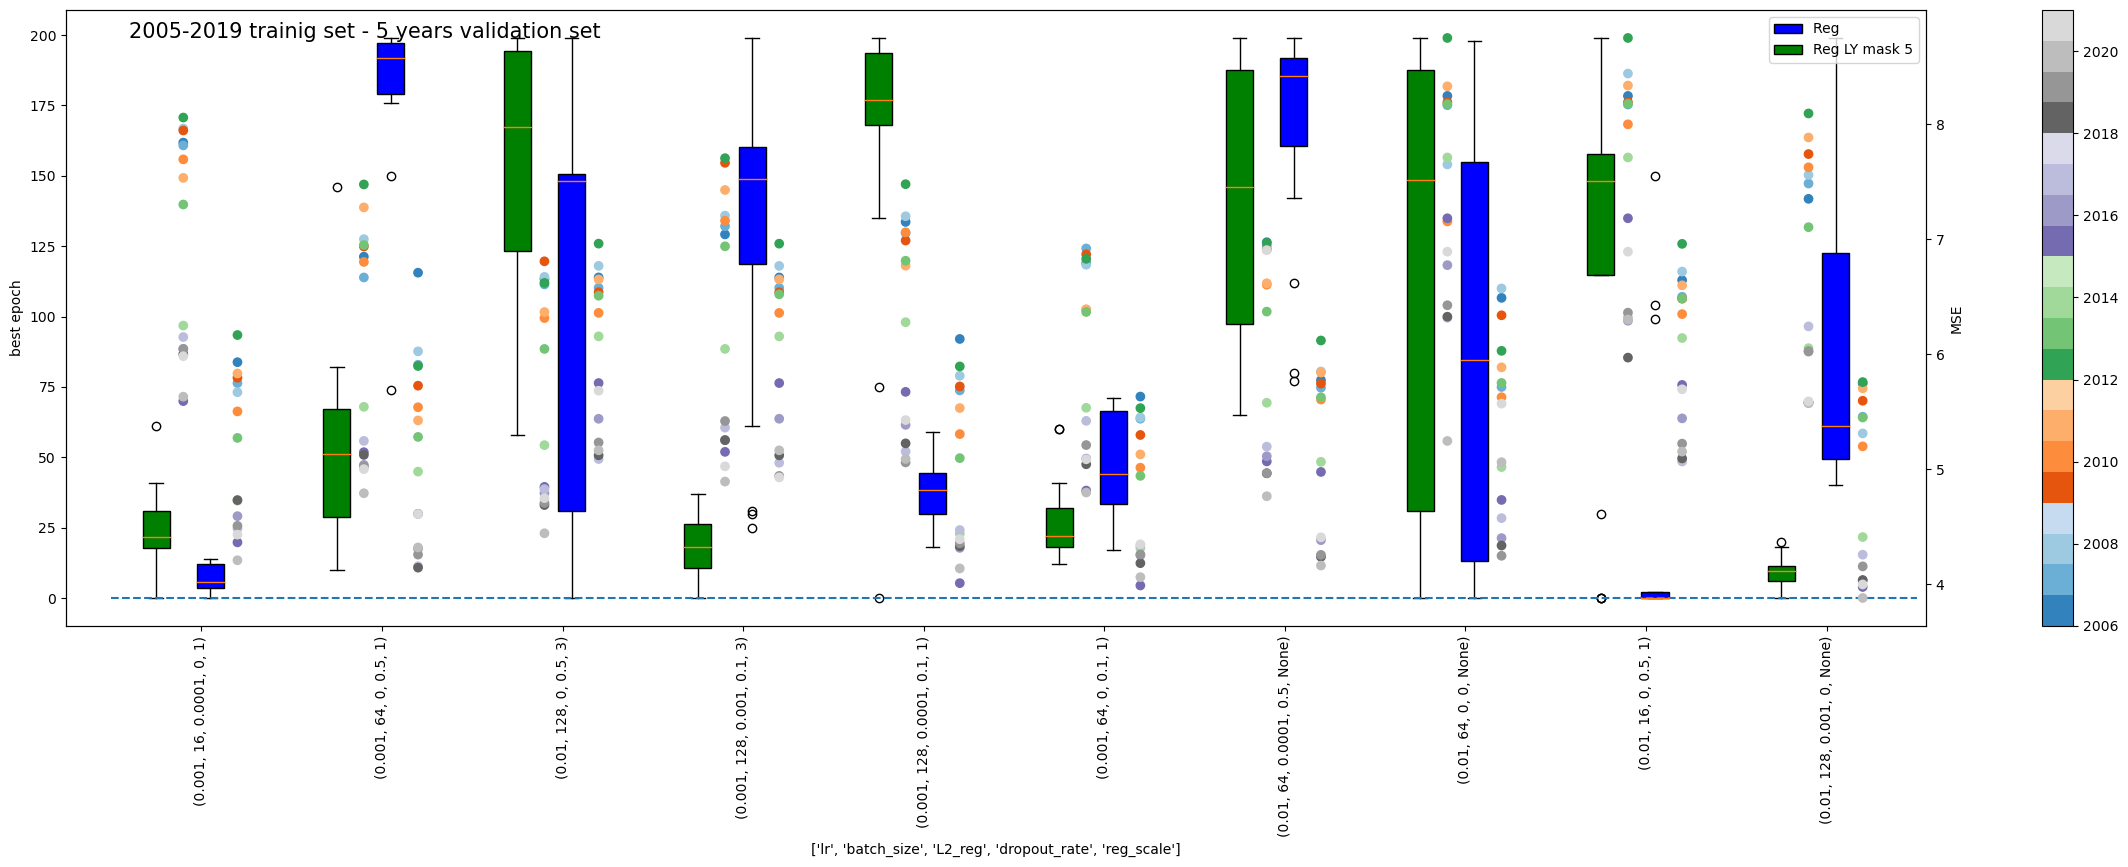

In [23]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

hp_num = len(val_loss.hyperparameters)
plt.figure(figsize = (30,8))
dataframe = val_loss.Validation_loss.argmin('epochs')
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "blue"), widths=0.15, positions = np.arange(hp_num)+0.05)
#################################
dataframe2 = val_loss2.Validation_loss.argmin('epochs')
b2 = plt.boxplot(dataframe2.values,patch_artist = True, boxprops = dict(facecolor = "green"), widths=0.15, positions = np.arange(hp_num)-0.25)
#################################
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.hlines(0, -0.5,hp_num - 0.5, linestyle = 'dashed')

plt.ylabel('best epoch')
plt.text(-0.4,val_loss.Validation_loss.shape[-1]-1, '2005-2019 trainig set - 5 years validation set ', size = 15)
plt.twinx()
#################################
dataframe = val_loss.Validation_loss.min('epochs')
# b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
for i in range(len(dataframe.hyperparameters)):
    plt.scatter((i+0.2)*np.ones(len(dataframe.test_years)),dataframe.isel(hyperparameters = i), c = dataframe.test_years , cmap = 'tab20c')
    if i==0:
        plt.colorbar()
#################################
dataframe2 = val_loss2.Validation_loss.min('epochs')
# b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
for i in range(len(dataframe2.hyperparameters)):
    plt.scatter((i-0.1)*np.ones(len(dataframe2.test_years)),dataframe2.isel(hyperparameters = i), c = dataframe2.test_years , cmap = 'tab20c' )
##############################

plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
# plt.legend([b1["boxes"][0], b2["boxes"][0]], ['epochs', 'MSE'], loc='upper right')
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['Reg ', 'Reg LY mask 5'], loc='upper right')

plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))

Text(0.5, 0, "['lr', 'batch_size', 'L2_reg', 'dropout_rate', 'reg_scale']")

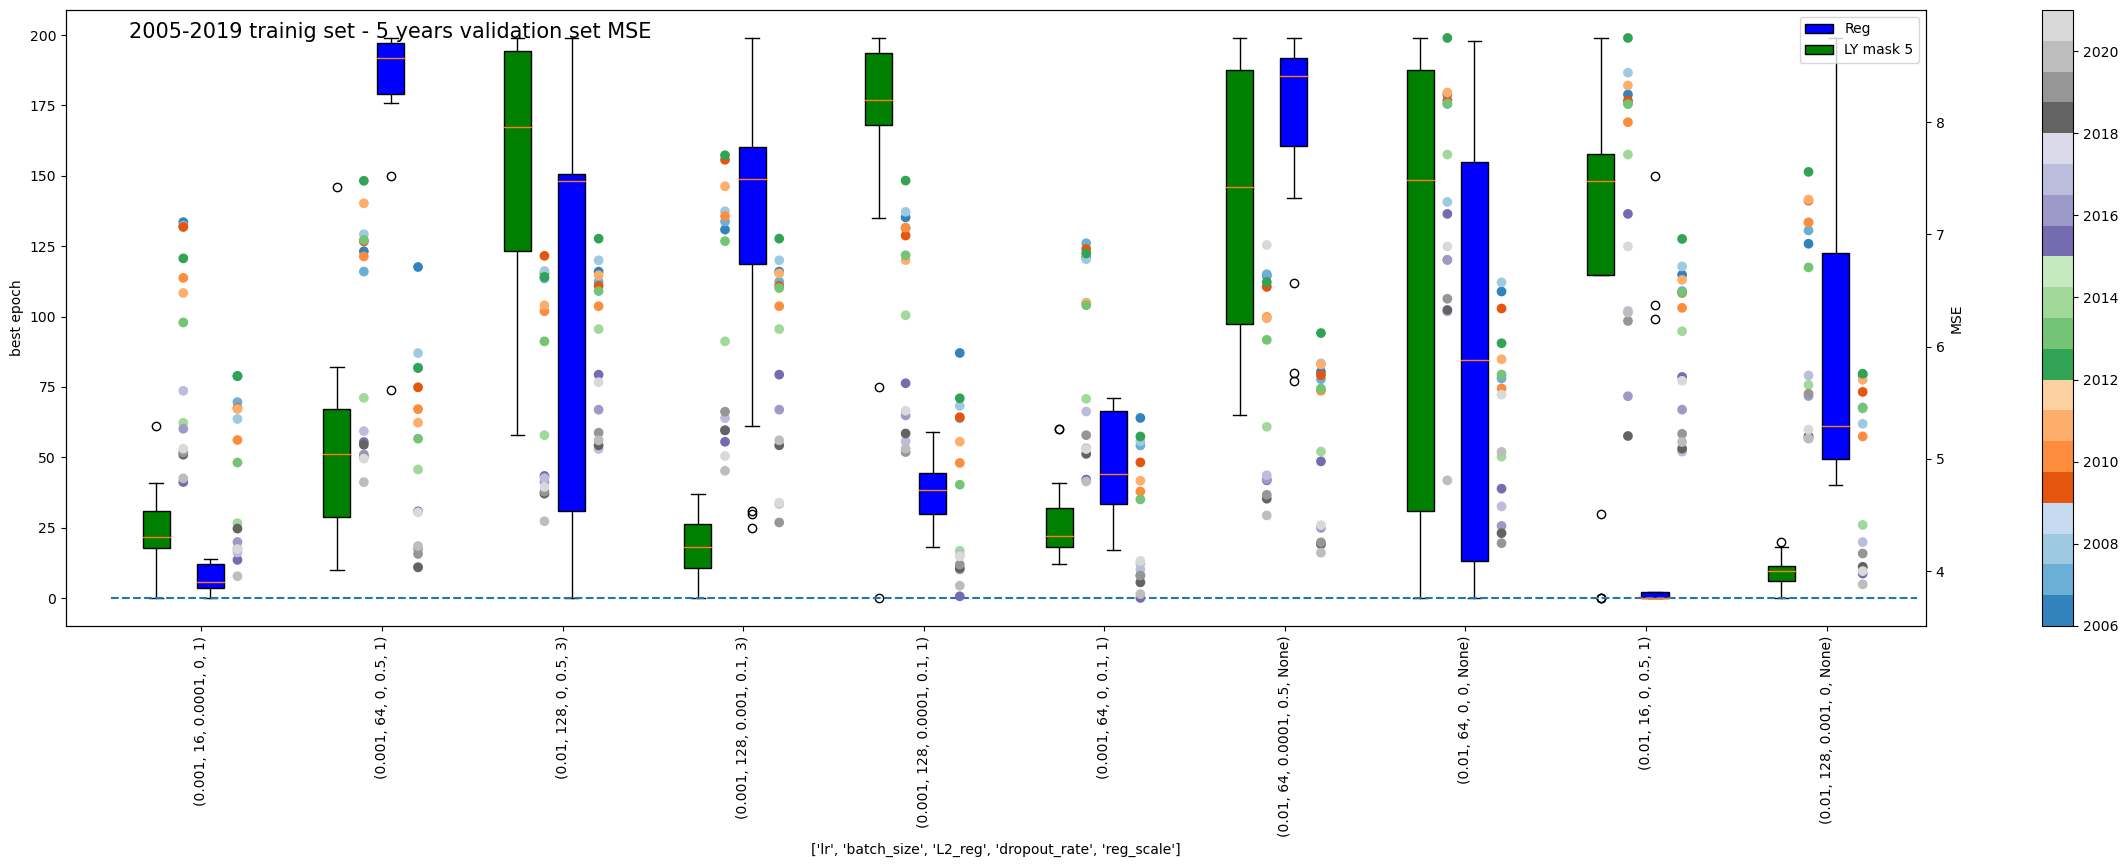

In [25]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

hp_num = len(val_loss.hyperparameters)
plt.figure(figsize = (30,8))
dataframe = val_loss.Validation_loss.argmin('epochs')
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "blue"), widths=0.15, positions = np.arange(hp_num)+0.05)
#################################
dataframe2 = val_loss2.Validation_loss.argmin('epochs')
b2 = plt.boxplot(dataframe2.values,patch_artist = True, boxprops = dict(facecolor = "green"), widths=0.15, positions = np.arange(hp_num)-0.25)
#################################
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.hlines(0, -0.5,hp_num - 0.5, linestyle = 'dashed')

plt.ylabel('best epoch')
plt.text(-0.4,val_loss.Validation_loss.shape[-1]-1, '2005-2019 trainig set - 5 years validation set MSE ', size = 15)
plt.twinx()
#################################
ls = []
for test_year in val_loss.test_years.values:
    inds = val_loss.Validation_loss.argmin('epochs').sel(test_years = test_year)
    ls.append(xr.concat([val_loss_MSE.Validation_loss.sel(test_years = test_year).isel(hyperparameters = i)[inds[i]] for i in range(val_loss_MSE.Validation_loss.shape[1])], dim = 'hyperparameters'))

dataframe = xr.concat(ls, dim = 'test_years')
# b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
for i in range(len(dataframe.hyperparameters)):
    plt.scatter((i+0.2)*np.ones(len(dataframe.test_years)),dataframe.isel(hyperparameters = i), c = dataframe.test_years , cmap = 'tab20c')
    if i==0:
        plt.colorbar()
#################################
ls = []
for test_year in val_loss2.test_years.values:
    inds = val_loss2.Validation_loss.argmin('epochs').sel(test_years = test_year)
    ls.append(xr.concat([val_loss_MSE2.Validation_loss.sel(test_years = test_year).isel(hyperparameters = i)[inds[i]] for i in range(val_loss_MSE2.Validation_loss.shape[1])], dim = 'hyperparameters'))

dataframe = xr.concat(ls, dim = 'test_years')
# b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
for i in range(len(dataframe.hyperparameters)):
    plt.scatter((i-0.1)*np.ones(len(dataframe.test_years)),dataframe.isel(hyperparameters = i), c = dataframe.test_years , cmap = 'tab20c' )
##############################

plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
# plt.legend([b1["boxes"][0], b2["boxes"][0]], ['epochs', 'MSE'], loc='upper right')
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['Reg', 'LY mask 5'], loc='upper right')

plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))

### Mean

Text(0.5, 394.72222222222223, "['lr', 'batch_size', 'L2_reg', 'dropout_rate']")

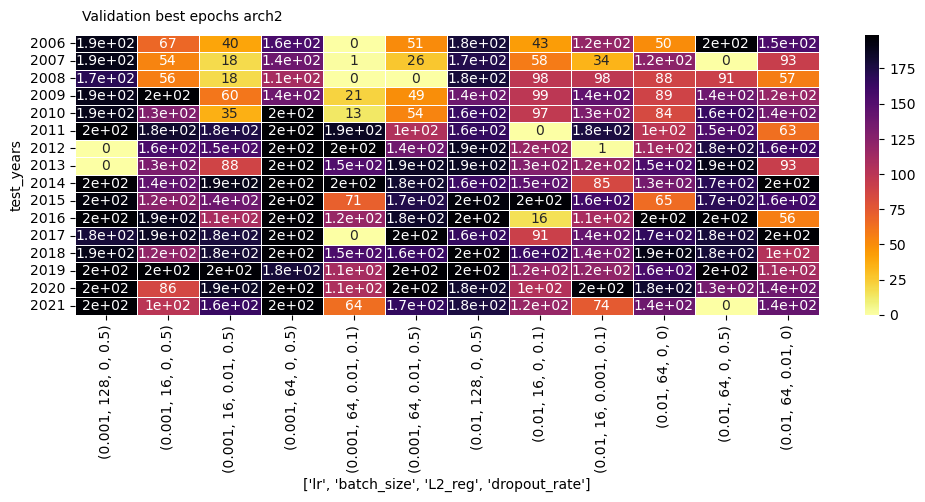

In [4]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss.Validation_loss.argmin('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best epochs arch2', transform=ax.transAxes)
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))




Text(0.5, 394.72222222222223, "['lr', 'batch_size', 'L2_reg', 'dropout_rate']")

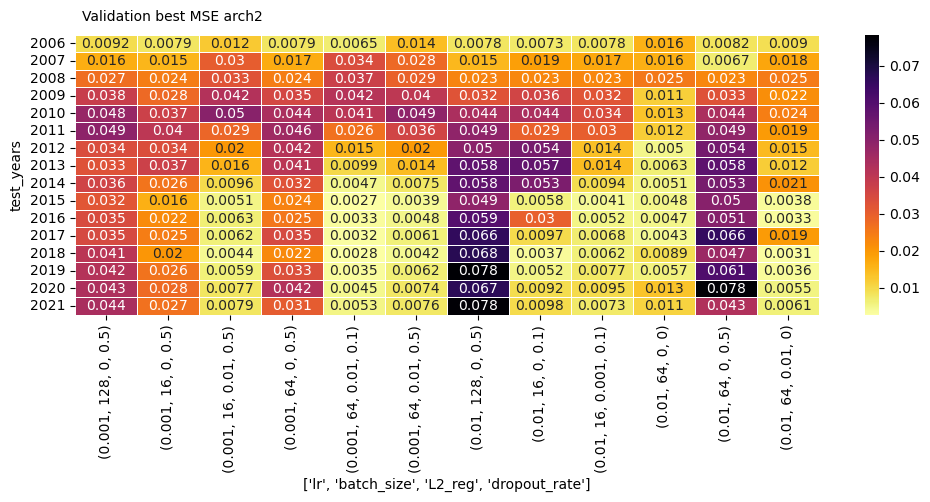

In [5]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss.Validation_loss.min('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best MSE arch2', transform=ax.transAxes)
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))



Text(0.5, 0, "['lr', 'batch_size', 'L2_reg', 'dropout_rate']")

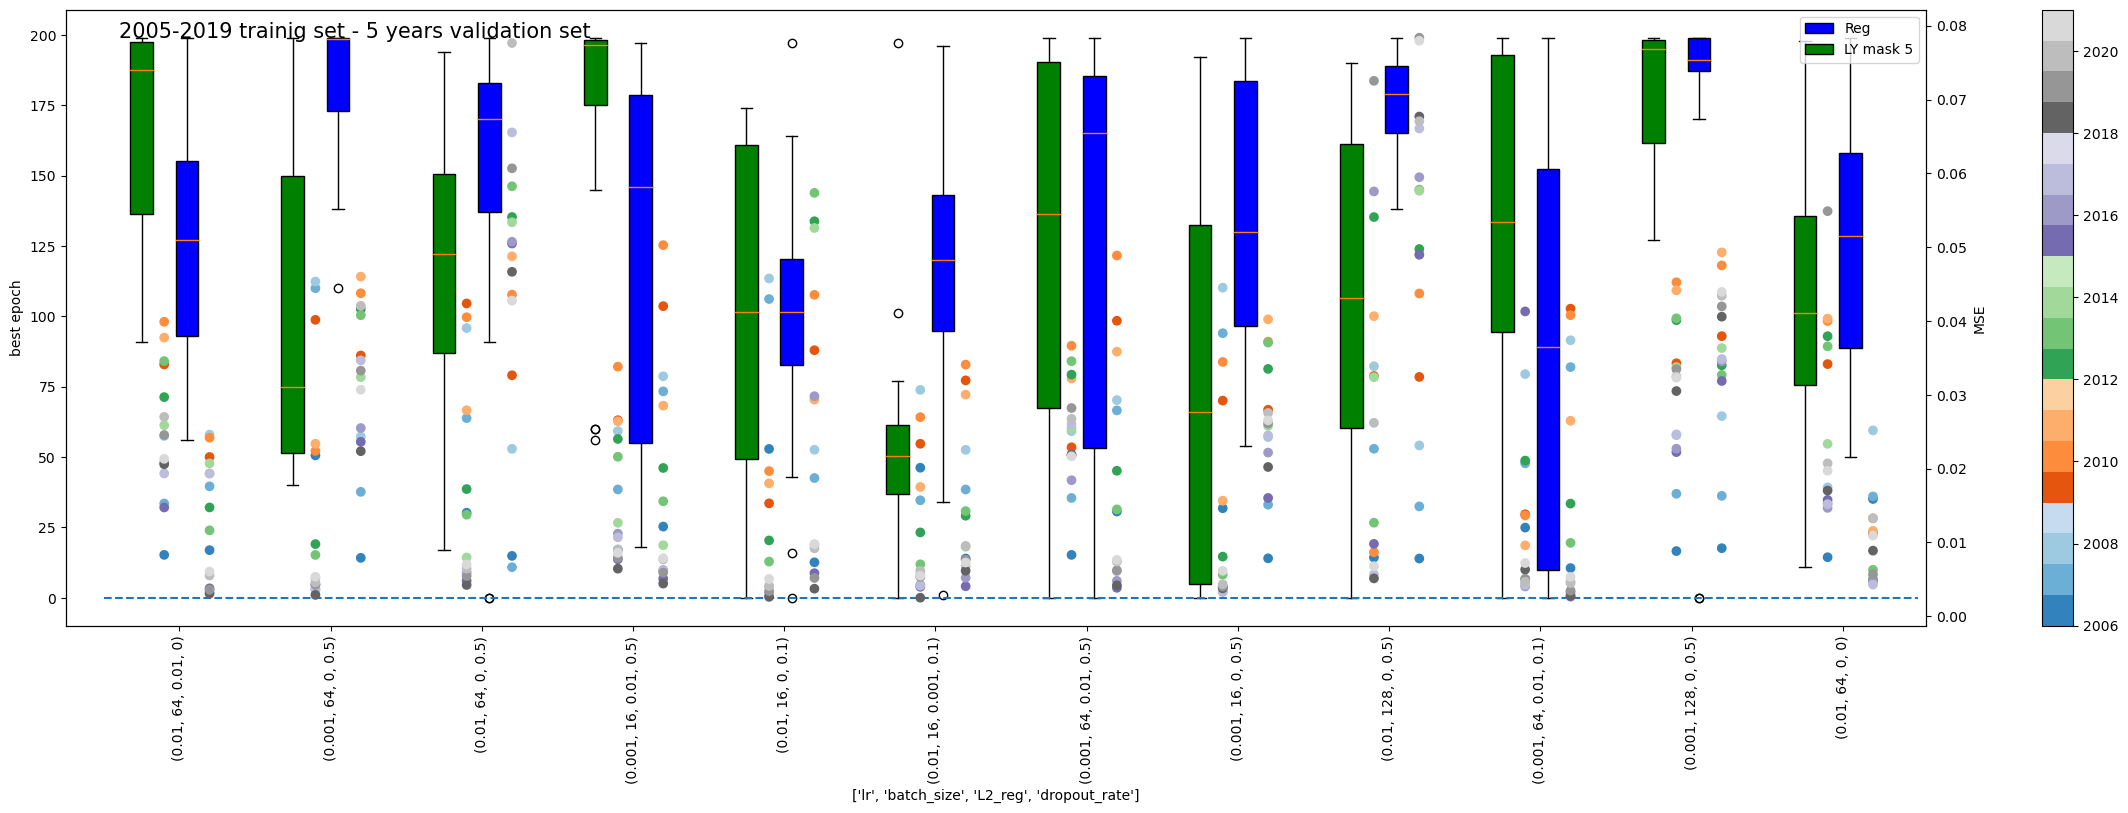

In [11]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

hp_num = len(val_loss.hyperparameters)
plt.figure(figsize = (30,8))
dataframe = val_loss.Validation_loss.argmin('epochs')
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "blue"), widths=0.15, positions = np.arange(hp_num)+0.05)
#################################
dataframe2 = val_loss2.Validation_loss.argmin('epochs')
b2 = plt.boxplot(dataframe2.values,patch_artist = True, boxprops = dict(facecolor = "green"), widths=0.15, positions = np.arange(hp_num)-0.25)
#################################
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.hlines(0, -0.5,hp_num - 0.5, linestyle = 'dashed')

plt.ylabel('best epoch')
plt.text(-0.4,val_loss.Validation_loss.shape[-1]-1, '2005-2019 trainig set - 5 years validation set ', size = 15)
plt.twinx()
#################################
dataframe = val_loss.Validation_loss.min('epochs')
# b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
for i in range(len(dataframe.hyperparameters)):
    plt.scatter((i+0.2)*np.ones(len(dataframe.test_years)),dataframe.isel(hyperparameters = i), c = dataframe.test_years , cmap = 'tab20c')
    if i==0:
        plt.colorbar()
#################################
dataframe2 = val_loss2.Validation_loss.min('epochs')
# b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
for i in range(len(dataframe2.hyperparameters)):
    plt.scatter((i-0.1)*np.ones(len(dataframe2.test_years)),dataframe2.isel(hyperparameters = i), c = dataframe2.test_years , cmap = 'tab20c' )
##############################

plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
# plt.legend([b1["boxes"][0], b2["boxes"][0]], ['epochs', 'MSE'], loc='upper right')
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['Reg', 'LY mask 5'], loc='upper right')

plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))

Text(0.5, 0, "['lr', 'batch_size', 'L2_reg', 'dropout_rate']")

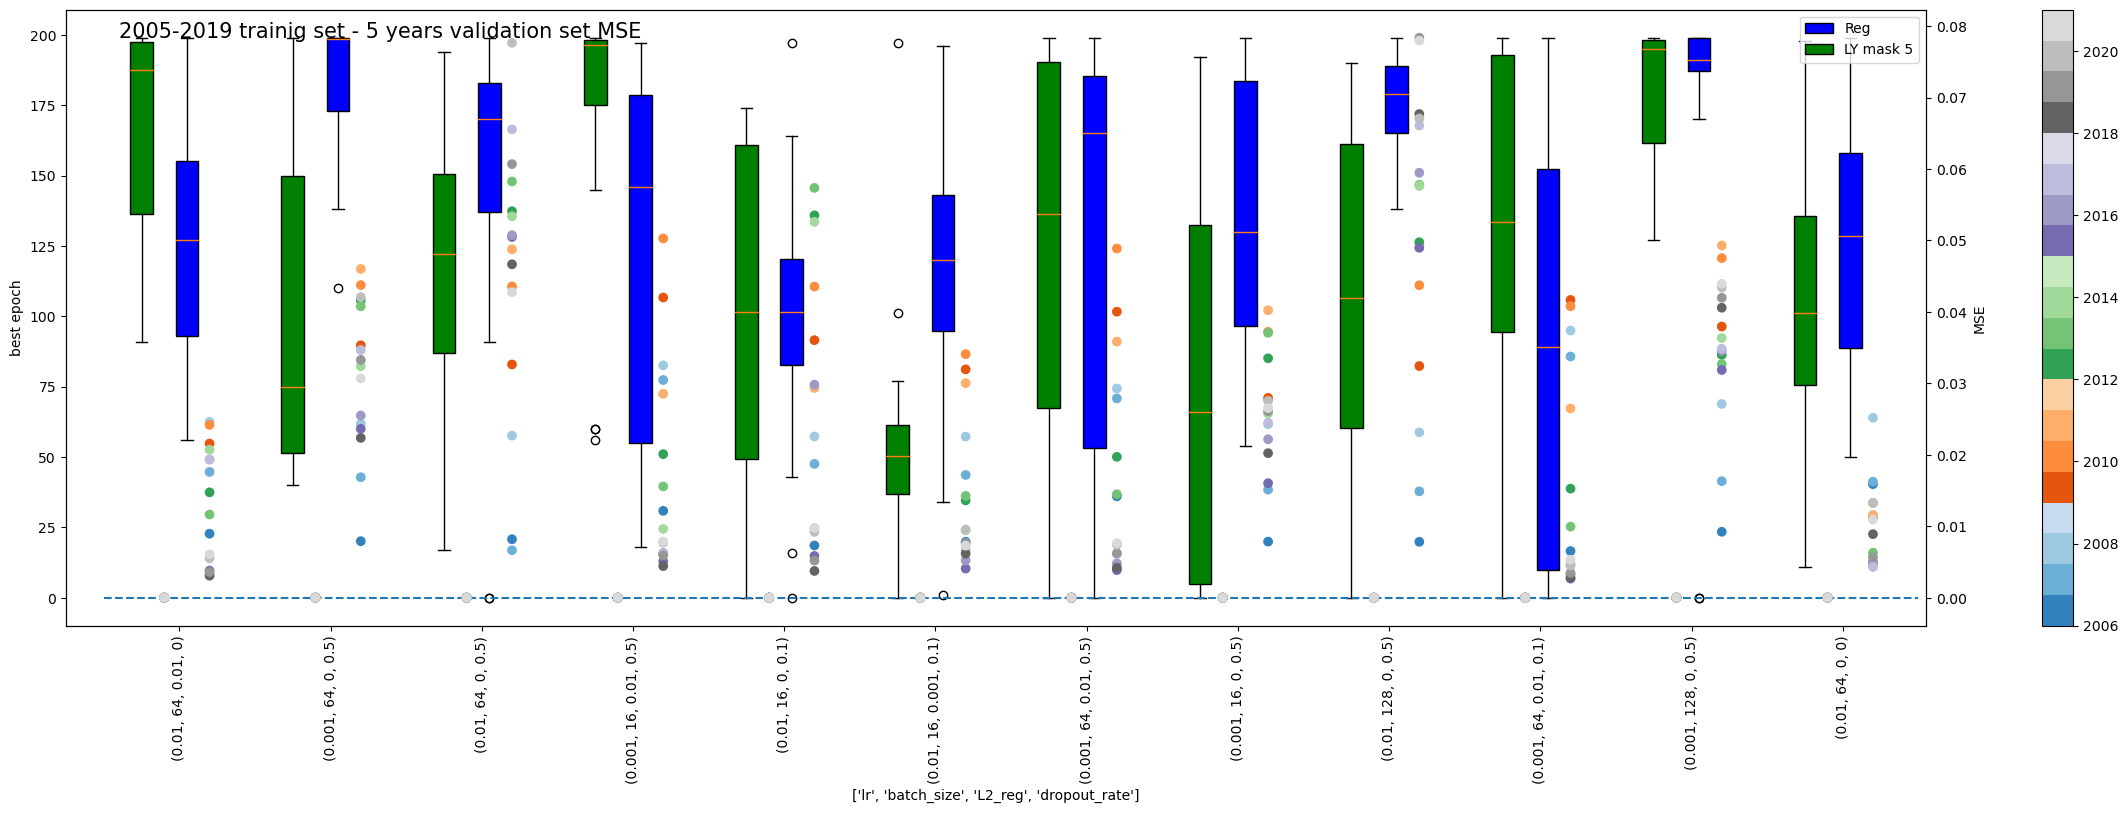

In [14]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

hp_num = len(val_loss.hyperparameters)
plt.figure(figsize = (30,8))
dataframe = val_loss.Validation_loss.argmin('epochs')
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "blue"), widths=0.15, positions = np.arange(hp_num)+0.05)
#################################
dataframe2 = val_loss2.Validation_loss.argmin('epochs')
b2 = plt.boxplot(dataframe2.values,patch_artist = True, boxprops = dict(facecolor = "green"), widths=0.15, positions = np.arange(hp_num)-0.25)
#################################
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.hlines(0, -0.5,hp_num - 0.5, linestyle = 'dashed')

plt.ylabel('best epoch')
plt.text(-0.4,val_loss.Validation_loss.shape[-1]-1, '2005-2019 trainig set - 5 years validation set MSE ', size = 15)
plt.twinx()
#################################
ls = []
for test_year in val_loss.test_years.values:
    inds = val_loss.Validation_loss.argmin('epochs').sel(test_years = test_year)
    ls.append(xr.concat([val_loss_MSE.Validation_loss.sel(test_years = test_year).isel(hyperparameters = i)[inds[i]] for i in range(val_loss_MSE.Validation_loss.shape[1])], dim = 'hyperparameters'))

dataframe = xr.concat(ls, dim = 'test_years')
# b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
for i in range(len(dataframe.hyperparameters)):
    plt.scatter((i+0.2)*np.ones(len(dataframe.test_years)),dataframe.isel(hyperparameters = i), c = dataframe.test_years , cmap = 'tab20c')
    if i==0:
        plt.colorbar()
#################################
ls = []
for test_year in val_loss2.test_years.values:
    inds = val_loss2.Validation_loss.argmin('epochs').sel(test_years = test_year)
    ls.append(xr.concat([val_loss_MSE2.Validation_loss.sel(test_years = test_year).isel(hyperparameters = i)[inds[i]] for i in range(val_loss_MSE2.Validation_loss.shape[1])], dim = 'hyperparameters'))

dataframe = xr.concat(ls, dim = 'test_years')
# b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
for i in range(len(dataframe.hyperparameters)):
    plt.scatter((i-0.1)*np.ones(len(dataframe.test_years)),dataframe.isel(hyperparameters = i), c = dataframe.test_years , cmap = 'tab20c' )
##############################

plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
# plt.legend([b1["boxes"][0], b2["boxes"][0]], ['epochs', 'MSE'], loc='upper right')
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['Reg', 'LY mask 5'], loc='upper right')

plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))

# AE decoupled

## V3

Text(0.5, 394.72222222222223, "['batch_size', 'reg_scale']")

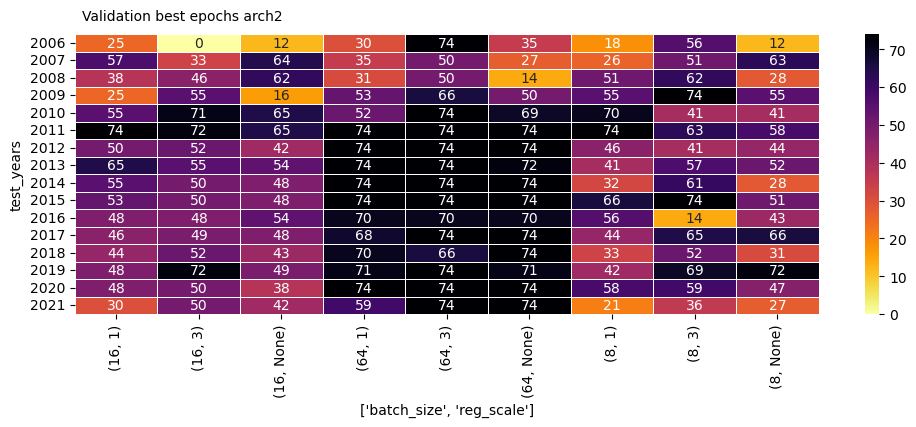

In [11]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss_corr.Validation_loss.argmax('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best epochs arch2', transform=ax.transAxes)
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))



Text(0.5, 394.72222222222223, "['batch_size', 'reg_scale']")

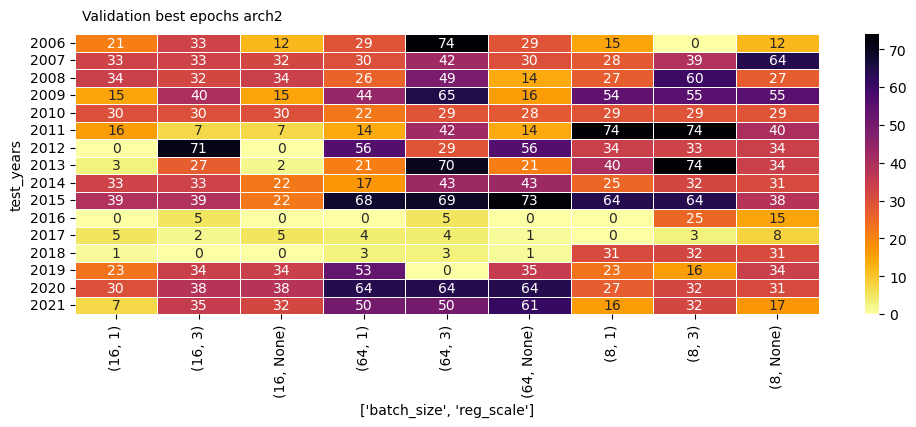

In [12]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss.Validation_loss.argmin('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best epochs arch2', transform=ax.transAxes)
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))



Text(0.5, 394.72222222222223, "['batch_size', 'reg_scale']")

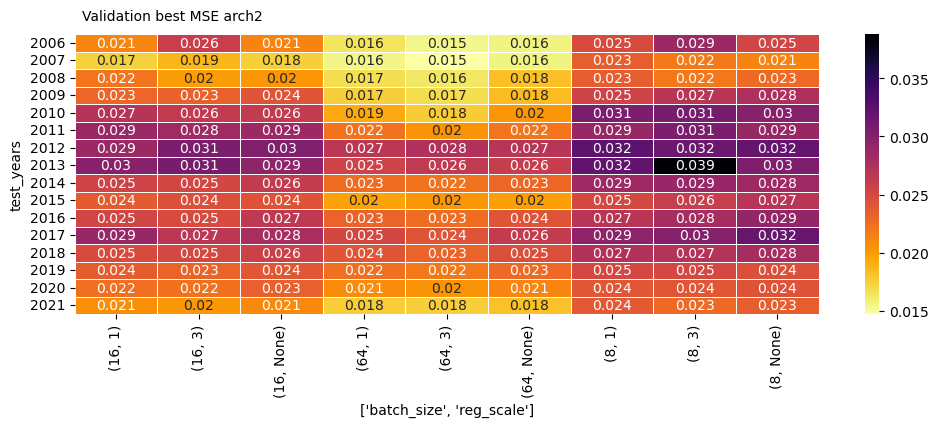

In [13]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss.Validation_loss.min('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best MSE arch2', transform=ax.transAxes)
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))



Text(0.5, 0, "['batch_size', 'reg_scale']")

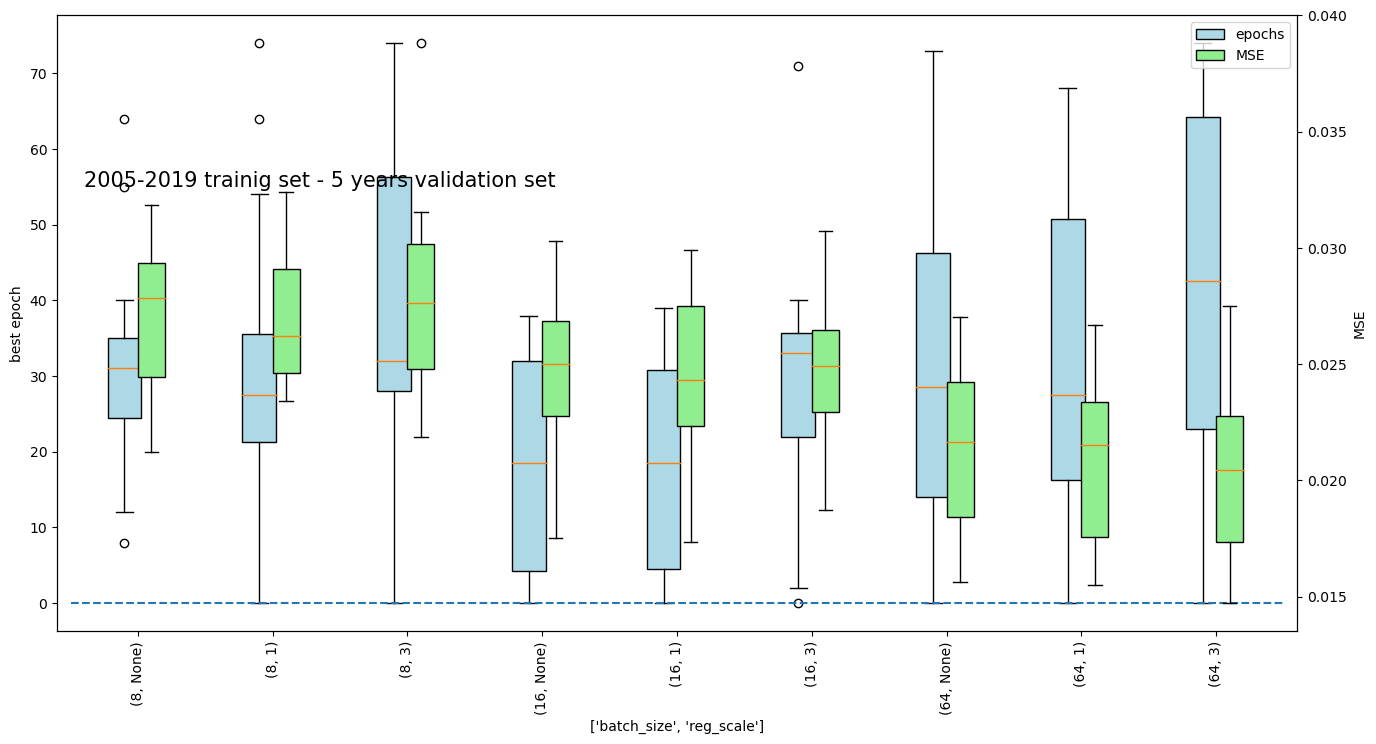

In [14]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

hp_num = len(val_loss.hyperparameters)
plt.figure(figsize = (16,8))
dataframe = val_loss.Validation_loss.argmin('epochs')
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightblue"), widths=0.25, positions = np.arange(hp_num)-0.1)
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.hlines(0, -0.5,hp_num - 0.5, linestyle = 'dashed')

plt.ylabel('best epoch')
plt.text(-0.4,55, '2005-2019 trainig set - 5 years validation set ', size = 15)
plt.twinx()
dataframe = val_loss.Validation_loss.min('epochs')
b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['epochs', 'MSE'], loc='upper right')
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))

Text(0.5, 0, "['batch_size', 'reg_scale']")

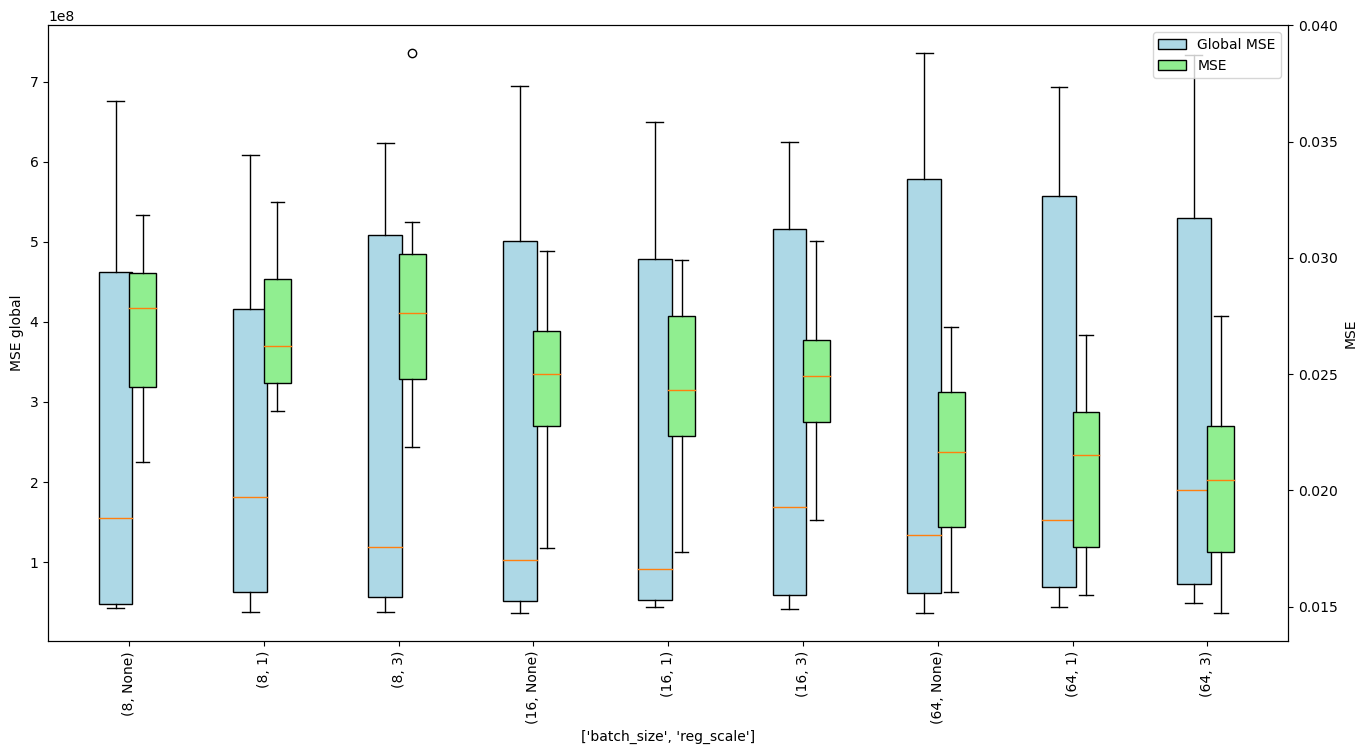

In [15]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (16,8))
dataframe = val_loss_global.Validation_loss.sel(epochs = val_loss.Validation_loss.argmin('epochs') )
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightblue"), widths=0.25, positions = np.arange(hp_num)-0.1)
plt.xlabel((val_loss_global.Validation_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)

plt.ylabel('MSE global')
# plt.text(-0.4,55, '2005-2019 trainig set - 5 years validation set ', size = 15)
plt.twinx()
dataframe = val_loss.Validation_loss.min('epochs')
b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['Global MSE', 'MSE'], loc='upper right')
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))

Text(0.5, 0, "['batch_size', 'reg_scale']")

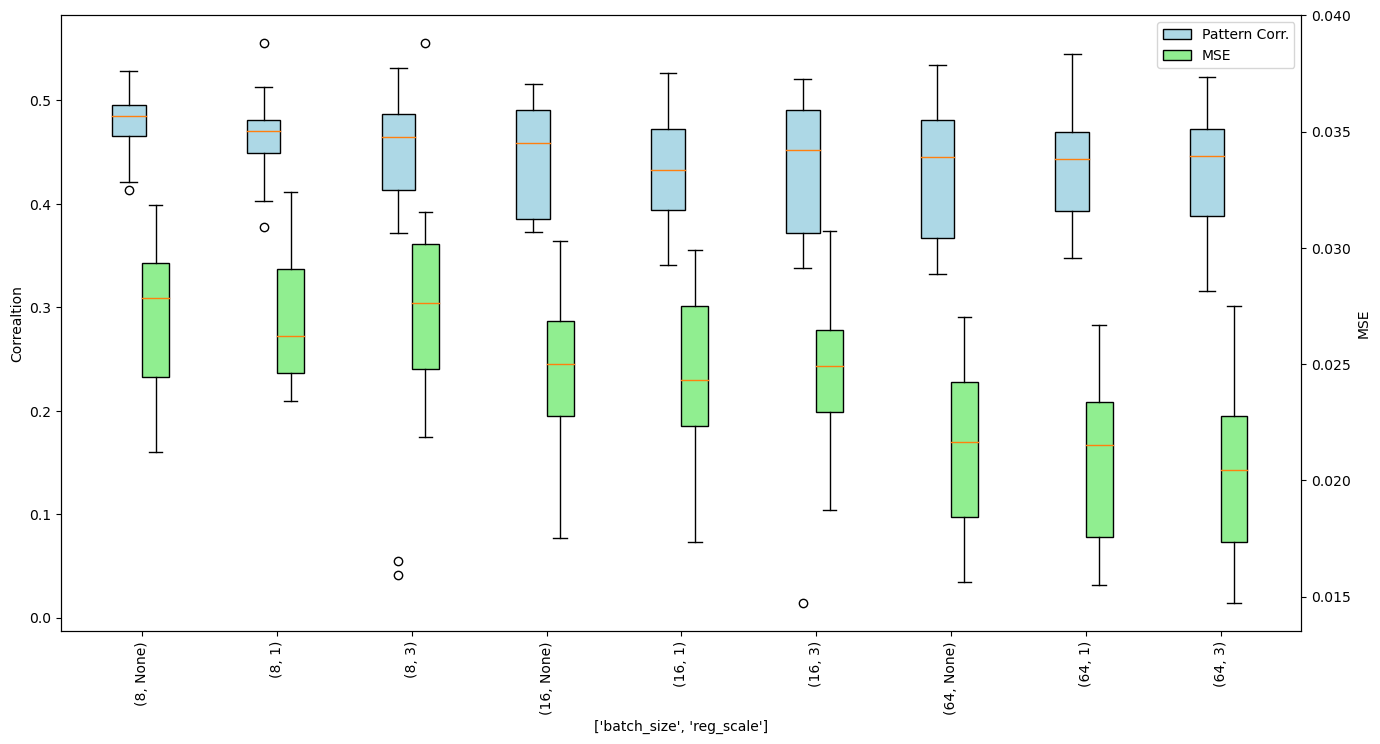

In [16]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (16,8))
dataframe = val_loss_corr.Validation_loss.sel(epochs = val_loss.Validation_loss.argmin('epochs') )
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightblue"), widths=0.25, positions = np.arange(hp_num)-0.1)
plt.xlabel((val_loss_global.Validation_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)

plt.ylabel('Correaltion')
# plt.text(-0.4,55, '2005-2019 trainig set - 5 years validation set ', size = 15)
plt.twinx()
dataframe = val_loss.Validation_loss.min('epochs')
b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['Pattern Corr.', 'MSE'], loc='upper right')
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))

# UNet

Text(0.5, 394.72222222222223, "['batch_size', 'reg_scale']")

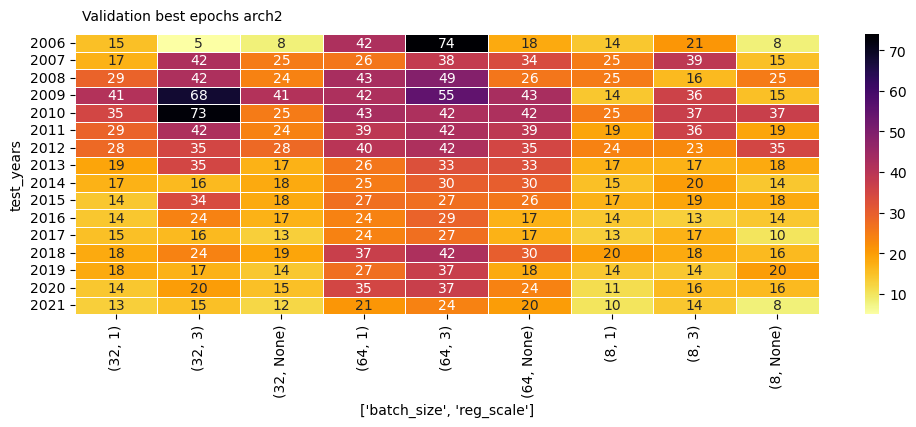

In [ ]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss_corr.Validation_loss.argmax('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best epochs arch2', transform=ax.transAxes)
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))



Text(0.5, 394.72222222222223, "['batch_size', 'reg_scale']")

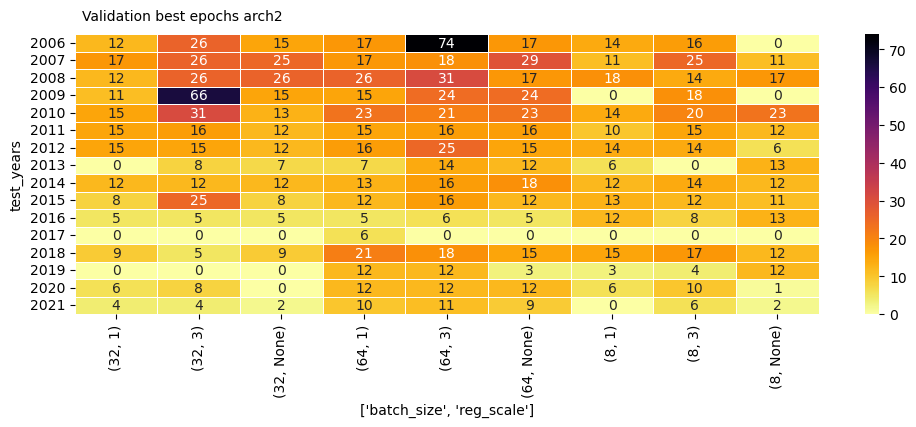

In [ ]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss.Validation_loss.argmin('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best epochs arch2', transform=ax.transAxes)
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))



Text(0.5, 394.72222222222223, "['batch_size', 'reg_scale']")

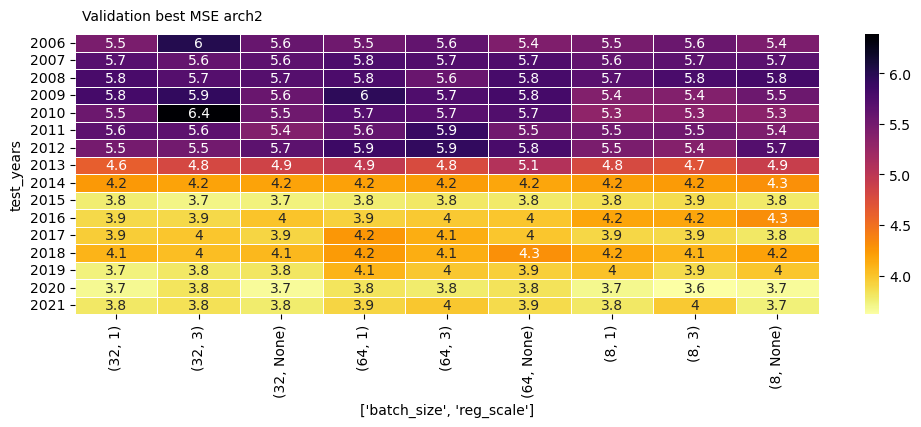

In [ ]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (12,8))
dataframe = val_loss.Validation_loss.min('epochs').to_dataframe().reset_index().pivot(index='test_years', columns=f'hyperparameters')['Validation_loss']
ax = plt.subplot(2,1,1)
ax = sns.heatmap(dataframe, annot=True,  cmap = 'inferno_r',linewidth=.5)

plt.xticks(rotation=90)
plt.text(0.01,1.05, f'Validation best MSE arch2', transform=ax.transAxes)
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))



Text(0.5, 0, "['batch_size', 'reg_scale']")

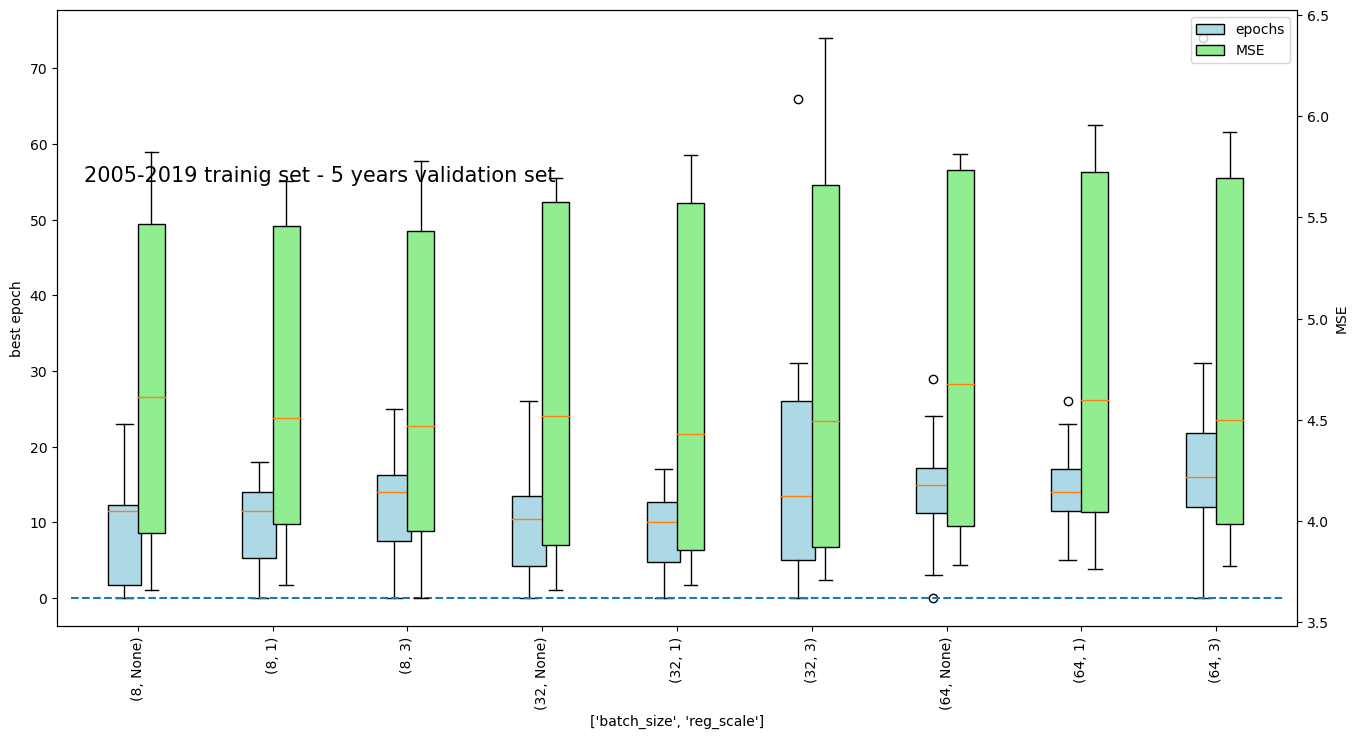

In [ ]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

hp_num = len(val_loss.hyperparameters)
plt.figure(figsize = (16,8))
dataframe = val_loss.Validation_loss.argmin('epochs')
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightblue"), widths=0.25, positions = np.arange(hp_num)-0.1)
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.hlines(0, -0.5,hp_num - 0.5, linestyle = 'dashed')

plt.ylabel('best epoch')
plt.text(-0.4,55, '2005-2019 trainig set - 5 years validation set ', size = 15)
plt.twinx()
dataframe = val_loss.Validation_loss.min('epochs')
b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['epochs', 'MSE'], loc='upper right')
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))

Text(0.5, 0, "['batch_size', 'reg_scale']")

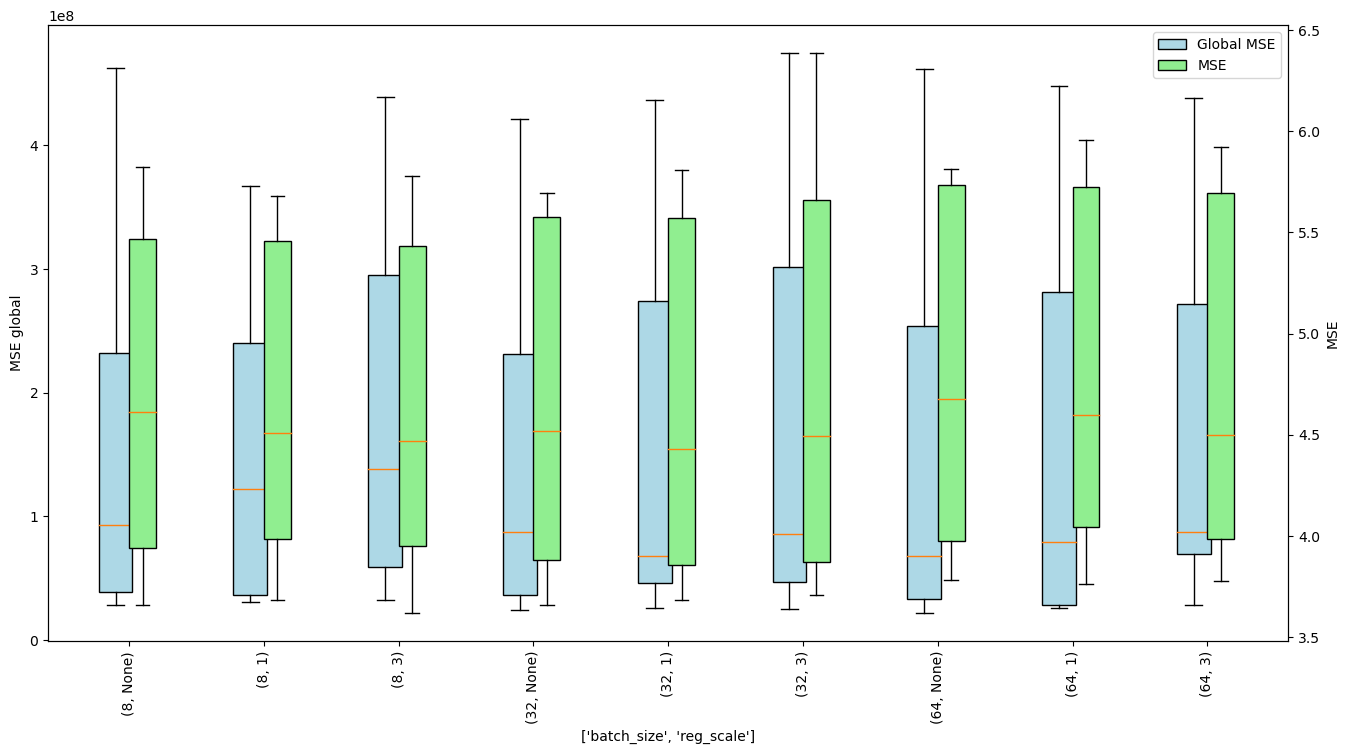

In [ ]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (16,8))
dataframe = val_loss_global.Validation_loss.sel(epochs = val_loss.Validation_loss.argmin('epochs') )
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightblue"), widths=0.25, positions = np.arange(hp_num)-0.1)
plt.xlabel((val_loss_global.Validation_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)

plt.ylabel('MSE global')
# plt.text(-0.4,55, '2005-2019 trainig set - 5 years validation set ', size = 15)
plt.twinx()
dataframe = val_loss.Validation_loss.min('epochs')
b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['Global MSE', 'MSE'], loc='upper right')
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))

Text(0.5, 0, "['batch_size', 'reg_scale']")

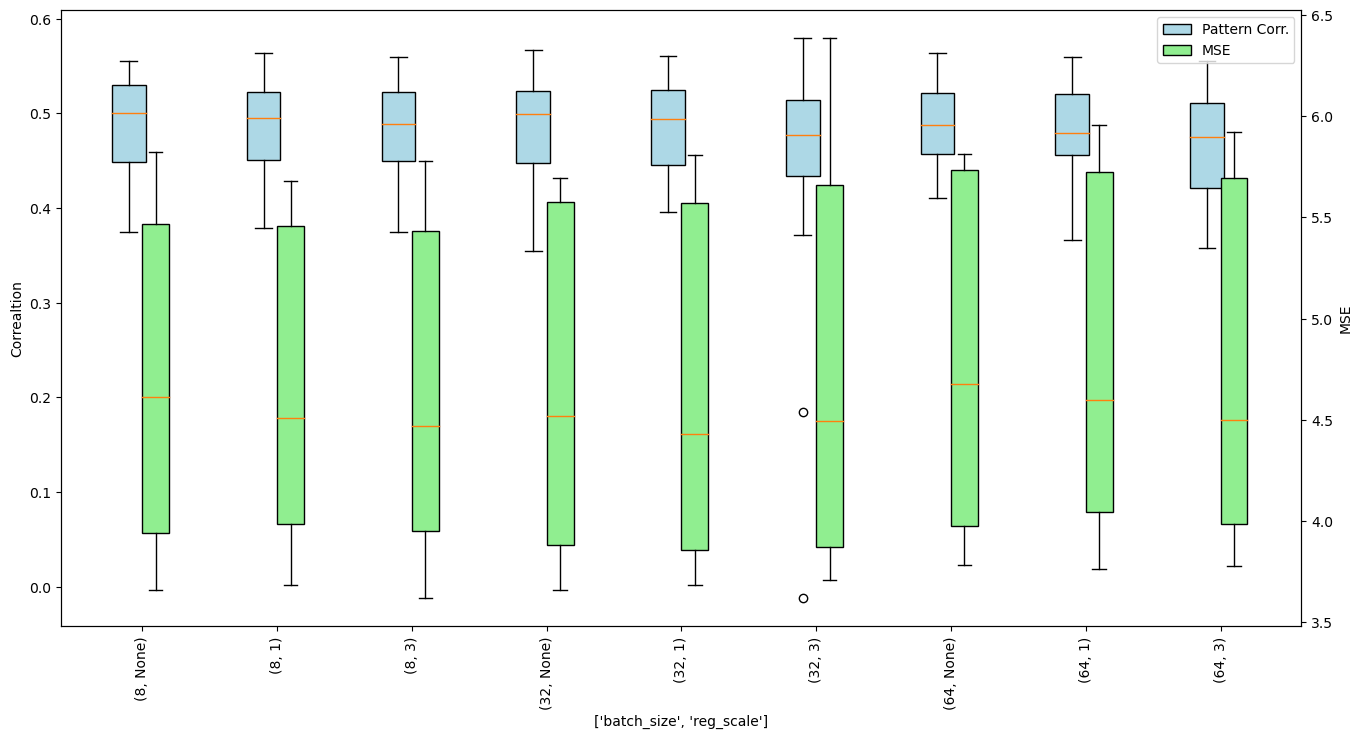

In [ ]:
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns

plt.figure(figsize = (16,8))
dataframe = val_loss_corr.Validation_loss.sel(epochs = val_loss.Validation_loss.argmin('epochs') )
b1 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightblue"), widths=0.25, positions = np.arange(hp_num)-0.1)
plt.xlabel((val_loss_global.Validation_loss.attrs['hyperparameters']))
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)

plt.ylabel('Correaltion')
# plt.text(-0.4,55, '2005-2019 trainig set - 5 years validation set ', size = 15)
plt.twinx()
dataframe = val_loss.Validation_loss.min('epochs')
b2 = plt.boxplot(dataframe.values,patch_artist = True, boxprops = dict(facecolor = "lightgreen"), widths=0.2, positions = np.arange(hp_num)+0.1)
plt.xticks(np.arange(0,hp_num),val_loss.hyperparameters.values,rotation=90)
plt.ylabel('MSE')
plt.legend([b1["boxes"][0], b2["boxes"][0]], ['Pattern Corr.', 'MSE'], loc='upper right')
plt.xlabel((val_loss.Validation_loss.attrs['hyperparameters']))

## Dif arch1 L0.5 & arch2 L3

In [19]:
dir_frnt_gen = '/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/output/fgco2/SOM-FFN/results/Autoencoder/run_set_5/Model_tunning/arch2/batch_reg_tunning_adj_lr_v1'


val_loss_1  = xr.open_dataset(dir_frnt_gen + '/validation_losses.nc')
val_loss_global_1 =  xr.open_dataset(dir_frnt_gen + '/validation_losses_global.nc')
val_loss_corr_1 =  xr.open_dataset(dir_frnt_gen + '/validation_losses_corr.nc')

In [20]:
dir_frnt_gen = '/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/output/fgco2/SOM-FFN/results/Autoencoder/run_set_5/Model_tunning/arch1/batch_reg_tunning_adj_lr_v1'


val_loss_2  = xr.open_dataset(dir_frnt_gen + '/validation_losses.nc')
val_loss_global_2 =  xr.open_dataset(dir_frnt_gen + '/validation_losses_global.nc')
val_loss_corr_2 =  xr.open_dataset(dir_frnt_gen + '/validation_losses_corr.nc')

Text(0, 0.5, 'MSE global')

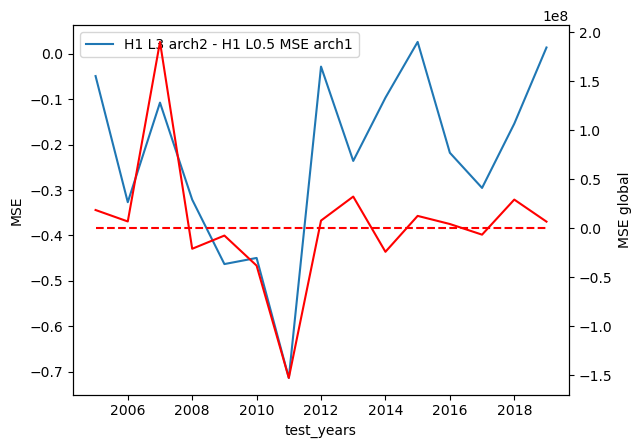

In [25]:
ds1 = val_loss_1.Validation_loss[:,4,:].min('epochs') - val_loss_2.Validation_loss[:,2,:].min('epochs')
ds1.plot(label = 'H1 L3 arch2 - H1 L0.5 MSE arch1')
plt.ylabel('MSE')
plt.legend()
arg1 = val_loss_1.Validation_loss[:,4,:].argmin('epochs') 
arg2 = val_loss_2.Validation_loss[:,2,:].argmin('epochs')

ds2 = val_loss_global_1.Validation_loss[:,4,:].sel(epochs = arg1) - val_loss_global_2.Validation_loss[:,2,:].sel(epochs = arg2)
plt.twinx()
ds2.plot(label = 'H1 L3 - H0 L0.5 Global MSE', color = 'r')
plt.hlines( 0 , 2005,2019, linestyle = 'dashed', color = 'r')
plt.ylabel('MSE global')
# plt.legend()

Text(0, 0.5, 'MSE global')

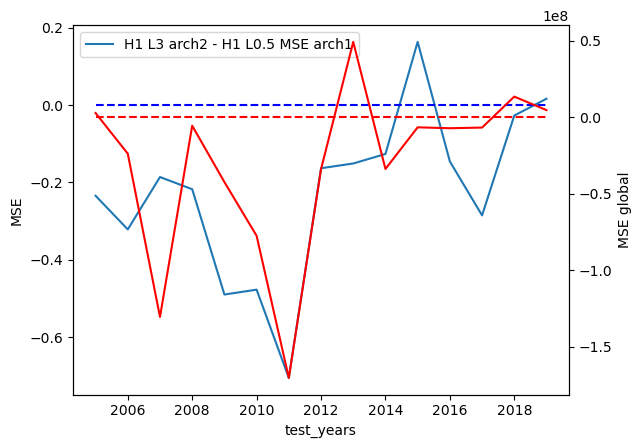

In [27]:
ds1 = val_loss_1.Validation_loss[:,4,:].sel(epochs = 25) - val_loss_2.Validation_loss[:,2,:].sel(epochs = 20)
ds1.plot(label = 'H1 L3 arch2 - H1 L0.5 MSE arch1')
plt.ylabel('MSE')
plt.legend()
plt.hlines( 0 , 2005,2019, linestyle = 'dashed', color = 'b')


ds2 = val_loss_global_1.Validation_loss[:,4,:].sel(epochs = 25) - val_loss_global_2.Validation_loss[:,2,:].sel(epochs = 20)
plt.twinx()
ds2.plot(label = 'H1 L3 - H0 L0.5 Global MSE', color = 'r')
plt.hlines( 0 , 2005,2019, linestyle = 'dashed', color = 'r')
plt.ylabel('MSE global')
# plt.legend()

In [16]:
data_dir_forecast = '/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/output/fgco2_ems/SOM-FFN/results/Autoencoder/run_set_3/N35_v03_decoupled_LNone_arch2_batch64_e60'
fct = xr.open_mfdataset(str(Path(data_dir_forecast, "*_1.nc")), combine='nested', concat_dim='year').load()['nn_adjusted']

data_dir_forecast = '/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/output/fgco2_ems/SOM-FFN/results/Autoencoder/run_set_3/N35_v03_decoupled_LNone_arch2_batch64_e60_realistic_emissions_after_2016'

fct_real = xr.open_mfdataset(str(Path(data_dir_forecast, "saved*.nc")), combine='nested', concat_dim='year').load()['nn_adjusted']

In [21]:

fct = xr.open_mfdataset(str(Path('/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/forecasts/canesm5-ems', "*.nc")), combine='nested', concat_dim='year').mean('ensembles')['fgco2']

fct_real = xr.open_mfdataset(str(Path('/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/forecasts/canesm5-ems-gcb', "*.nc")), combine='nested', concat_dim='year').mean('ensembles')['fgco2']


In [3]:
import numpy as np
import xarray as xr
from numpy import meshgrid, deg2rad, gradient, sin, cos
from xarray import DataArray
from pathlib import Path
def earth_radius(lat):
    '''
    calculate radius of Earth assuming oblate spheroid
    defined by WGS84
    
    Input
    ---------
    lat: vector or latitudes in degrees  
    
    Output
    ----------
    r: vector of radius in meters
    
    Notes
    -----------
    WGS84: https://earth-info.nga.mil/GandG/publications/tr8350.2/tr8350.2-a/Chapter%203.pdf
    '''
    # import numpy as np
    # from numpy import deg2rad, sin, cos

    # define oblate spheroid from WGS84
    a = 6378137
    b = 6356752.3142
    e2 = 1 - (b**2/a**2)
    
    # convert from geodecic to geocentric
    # see equation 3-110 in WGS84
    lat = deg2rad(lat)
    lat_gc = np.arctan( (1-e2)*np.tan(lat) )

    # radius equation
    # see equation 3-107 in WGS84
    r = (
        (a * (1 - e2)**0.5) 
         / (1 - (e2 * np.cos(lat_gc)**2))**0.5 
        )

    return r

def area_grid(lat, lon, mask=None):
    """
    Calculate the area of each grid cell
    Area is in square meters
    
    Input
    -----------
    lat: vector of latitude in degrees
    lon: vector of longitude in degrees
    
    Output
    -----------
    area: grid-cell area in square-meters with dimensions, [lat,lon]
    
    Notes
    -----------
    Based on the function in
    https://github.com/chadagreene/CDT/blob/master/cdt/cdtarea.m
    """
    # from numpy import meshgrid, deg2rad, gradient, cos
    # from xarray import DataArray

    if mask is None:
        mask = np.ones((len(lat),
                        len(lon)))  # new
    
    xlon, ylat = meshgrid(lon, lat)
    R = earth_radius(ylat)

    dlat = deg2rad(gradient(ylat, axis=0))
    dlon = deg2rad(gradient(xlon, axis=1))

    dy = dlat * R
    dx = dlon * R * cos(deg2rad(ylat))

    area = dy * mask * dx    # new
    
    xda = DataArray(
        area,
        dims=["lat", "lon"],
        coords={"lat": lat, "lon": lon},
        attrs={
            "long_name": "area_per_pixel",
            "description": "area per pixel",
            "units": "m^2",
        },
    )
    return xda

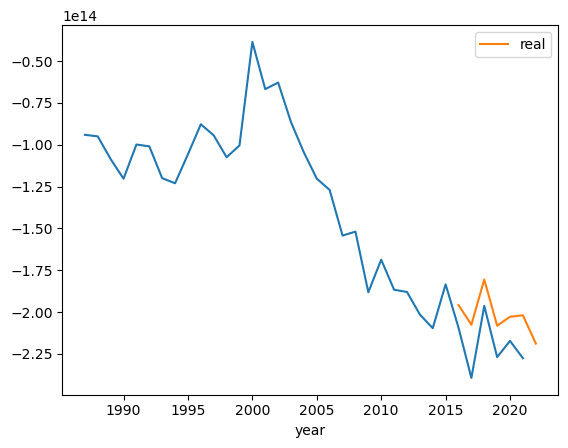

In [17]:
area = area_grid(fct.lat, fct.lon)
(fct*area).sum(['lat','lon'])[:,:12].mean('lead_time').plot()
(fct_real*area).sum(['lat','lon'])[:,:12].mean('lead_time').plot(label = 'real')
plt.legend()

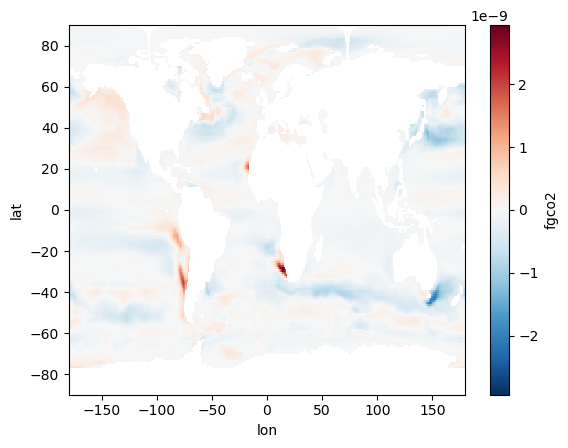

In [22]:
(fct_real[:-1,:12].mean(['year','lead_time']) - fct.sel(year = fct_real[:-1,:12].year).mean(['year','lead_time'])).plot()

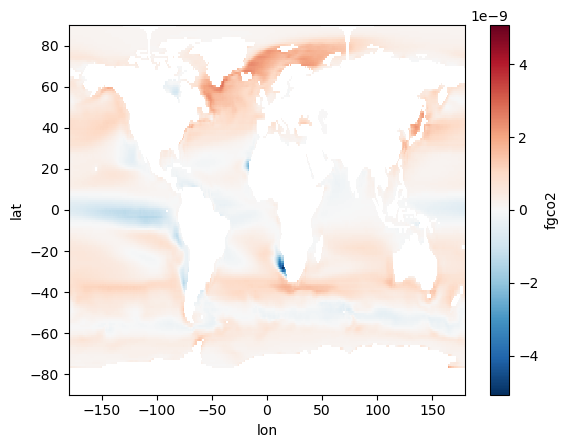

In [14]:
fct.sel(year = fct_real.year).mean(['year','lead_time']).plot()